# **Telecom Churn Prediction**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TelecomChurnPrediction/Churn_ Data.csv')
df.head(5)

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -0.76        88.0482          3.106604           3.754955   
1             -0.98        67.5039          3.094574           5.550865   
2             -0.98        33.9248          2.324016           2.438114   
3             -0.92        82.6780          2.630749           2.858961   
4             -0.97        96.8379          2.674316           2.912397   

   s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0              4                14          39.29            57.320   
1              1                 2          21.67            38.700   
2              2                 3          30.00            15.320   
3              2                 3          50.00            51.956   
4              3                 2          22.50            66.886   

   s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0          -0.17                 1  ...                    0.454642   
1          -0.32                 3  ...                    0.343190   
2          -0.05                 3  ...                    0.101838   
3          -0.18                 4  ...                    0.066602   
4           0.01                 4  ...                    0.219821   

   prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0            0.497397                 4                  0   
1            0.767617                 6                  0   
2            0.619034                 6                  1   
3            0.437088                 7                  2   
4            0.585977                 6                  1   

   s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
0                   9              6.02           8.20           46.465636   
1                  20              3.66           8.10           34.525456   
2                  19              4.33           4.36           10.298451   
3                  11              3.40           3.53            6.670783   
4                  14              3.85           3.87           21.998905   

   prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
0                    0.609456       0.22  
1                    1.000000       0.38  
2                    0.699592       0.11  
3                    0.086617       5.18  
4                    0.683105       0.10  

[5 rows x 111 columns]

# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


In [ ]:
df.shape

(25000, 111)

In [ ]:
#data types of the columns
df.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
                               ...   
s3.og.rev.all.m2              float64
s3.new.rev.m2                 float64
prop.og.mou.any.p6            float64
prop.loc.i2i.mou.og.mou.p3    float64
s3.rev.p1                     float64
Length: 111, dtype: object

In [ ]:
df.isna().sum()

s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
                             ..
s3.og.rev.all.m2              0
s3.new.rev.m2                 0
prop.og.mou.any.p6            0
prop.loc.i2i.mou.og.mou.p3    0
s3.rev.p1                     0
Length: 111, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
uni_col=df.nunique() #count the number of unique values
one_uni_col=uni_col[uni_col==1].index #columns with exactly one unique value.
data = df.drop(columns=one_uni_col)
data.shape

(25000, 111)

In [ ]:
# Identify columns with only one unique value


In [ ]:
# Remove zero variance columns
#all the values are the same. This means there is no variability in the data for that column,
#making the variance (a measure of variability) equal to zero.
zero_variance_cols = [col for col in data.columns if data[col].var() == 0]
# zero_variance_cols
data = data.drop(columns=zero_variance_cols)
data.shape

(25000, 111)

s6.new.rev.p2.m2: 0 outliers below and 1024 outliers above


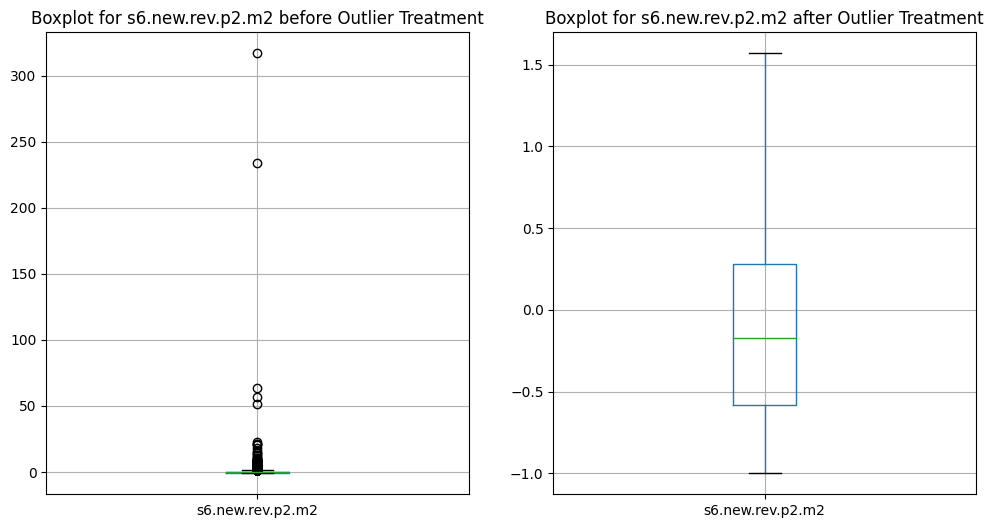



s1.new.rev.m1: 0 outliers below and 1335 outliers above


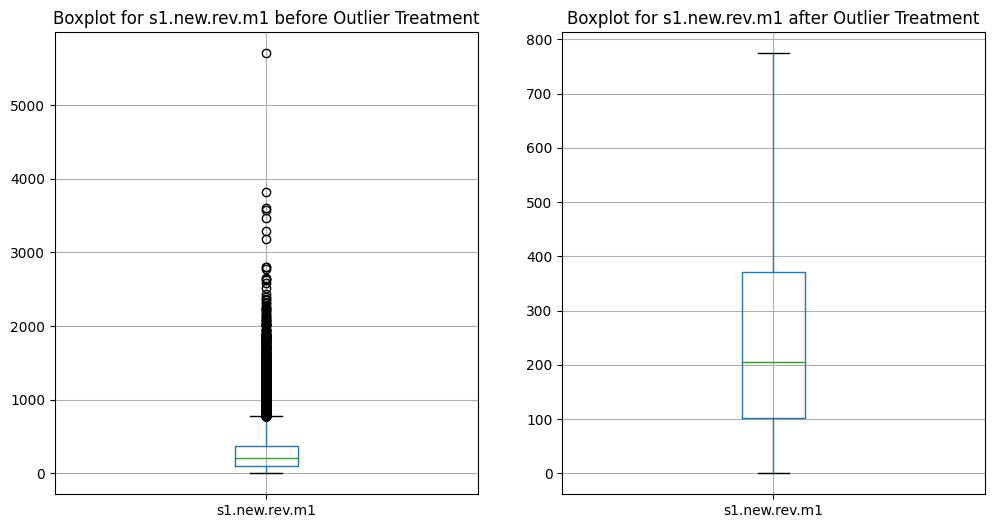



s3.og.rev.4db.p5: 0 outliers below and 1543 outliers above


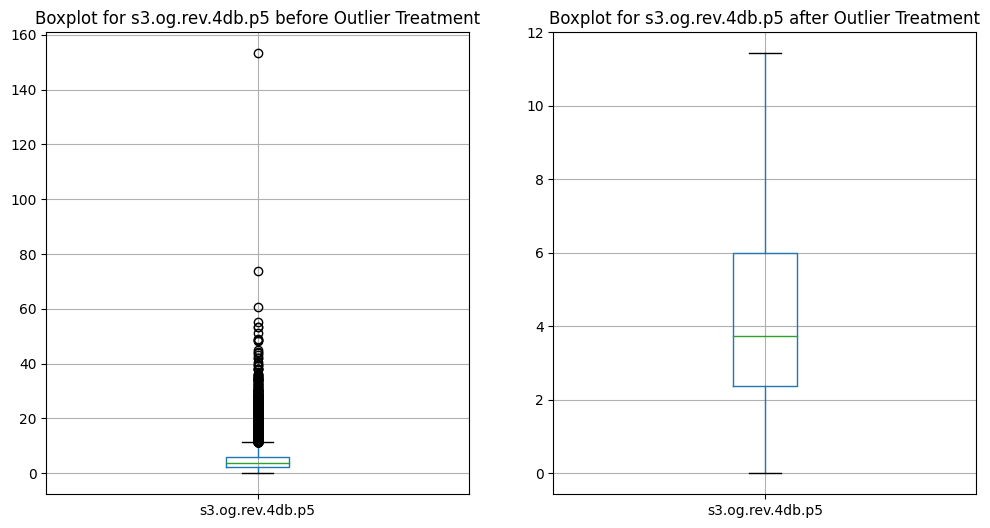



s3.new.rev.4db.p5: 0 outliers below and 1934 outliers above


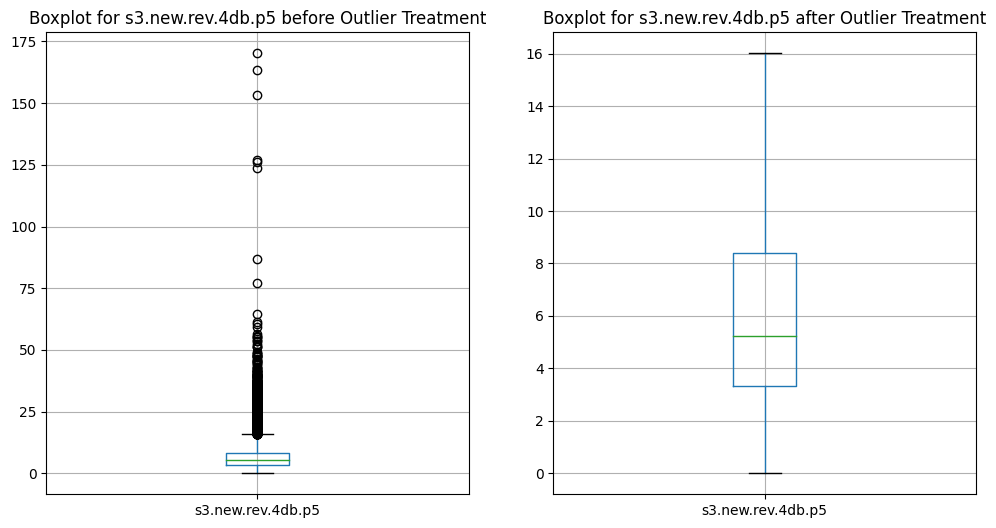



s4.usg.ins.p2: 2452 outliers below and 0 outliers above


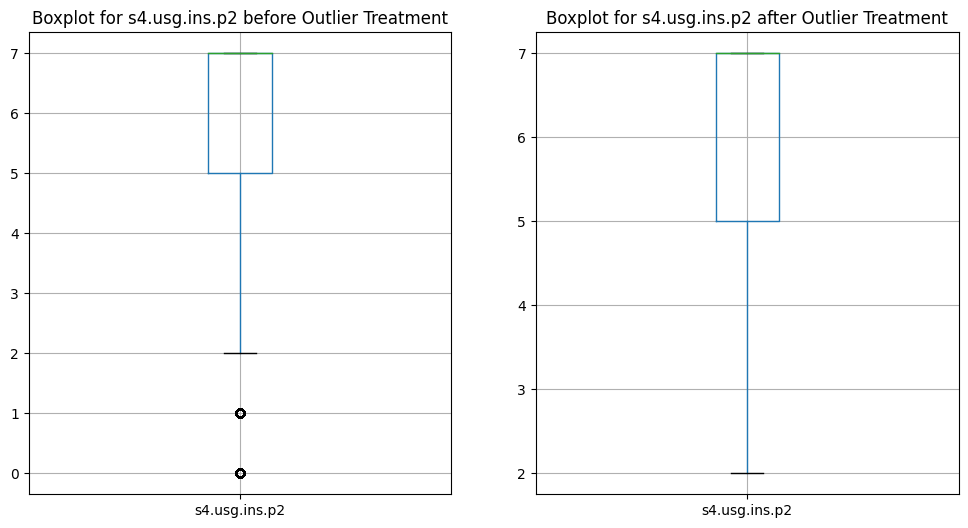



s4.og.unq.any.p2: 0 outliers below and 1187 outliers above


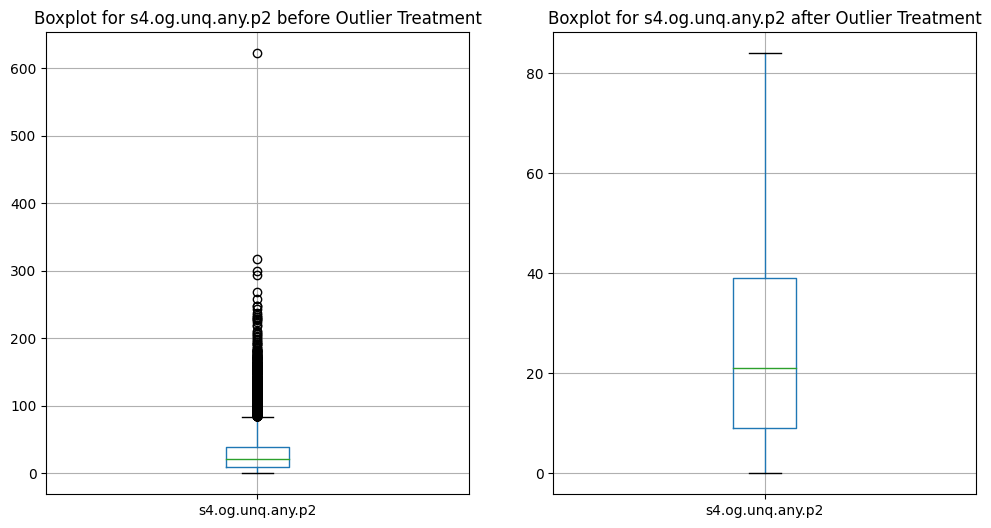



s2.rch.val.p6: 0 outliers below and 1677 outliers above


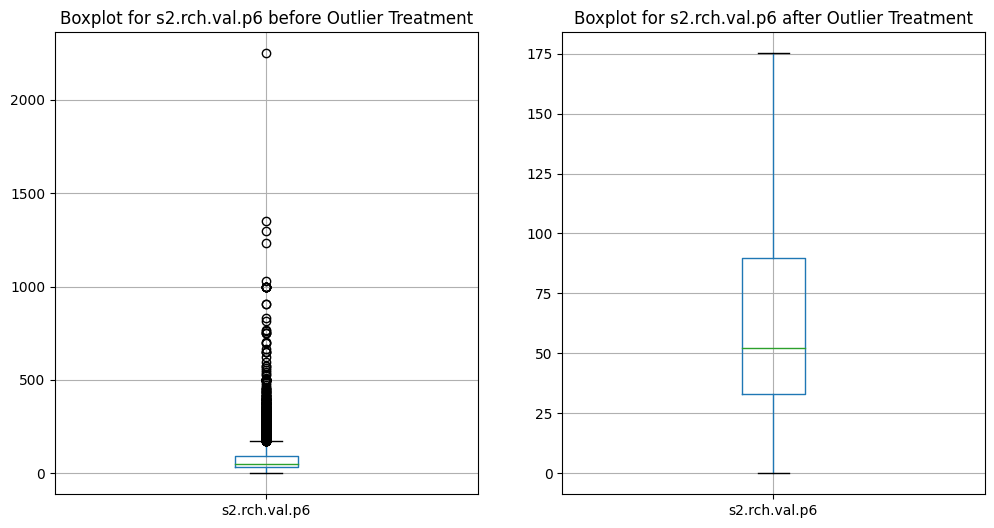



s1.og.rev.all.m1: 0 outliers below and 1506 outliers above


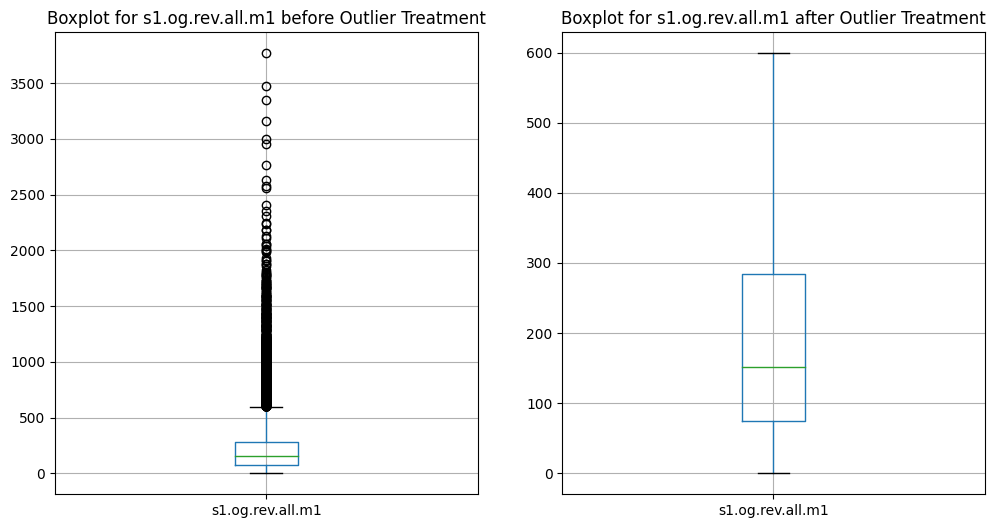



s8.new.rev.p6: 1143 outliers below and 1073 outliers above


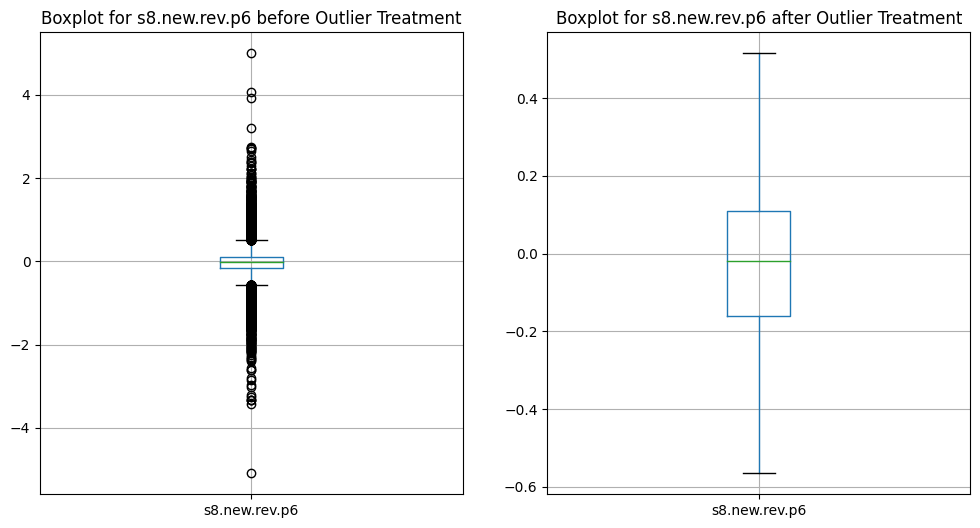



s4.loc.ic.ins.p1: 2873 outliers below and 0 outliers above


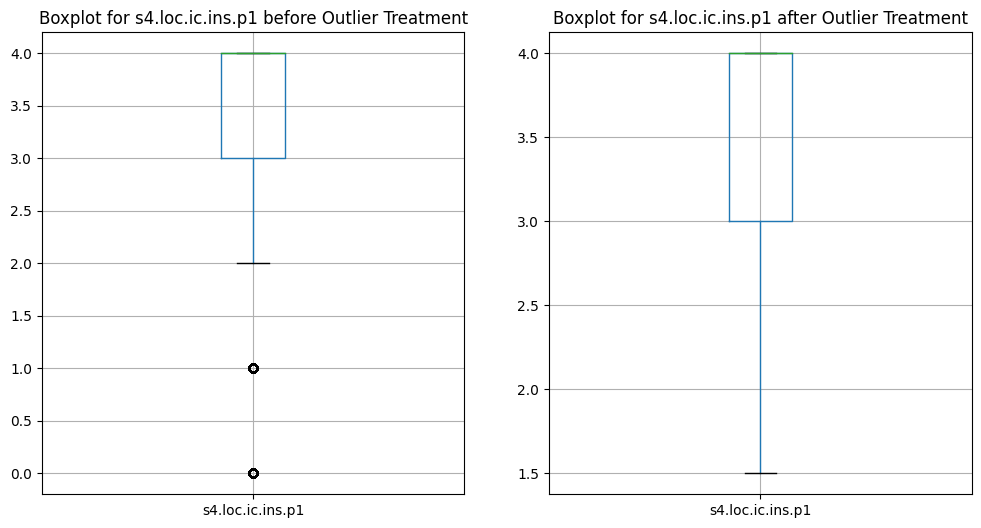



s8.mbl.p2: 2049 outliers below and 2544 outliers above


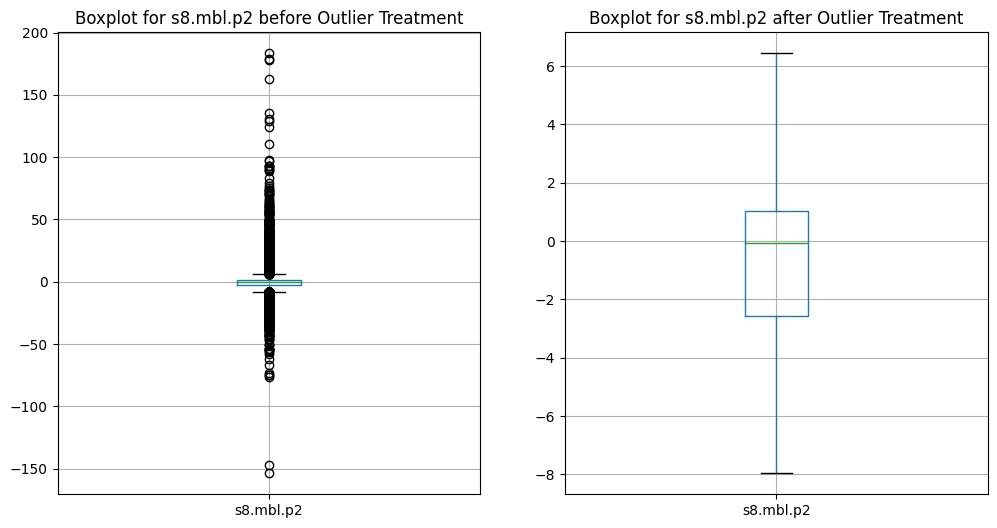



s2.rch.val.l67: 0 outliers below and 1715 outliers above


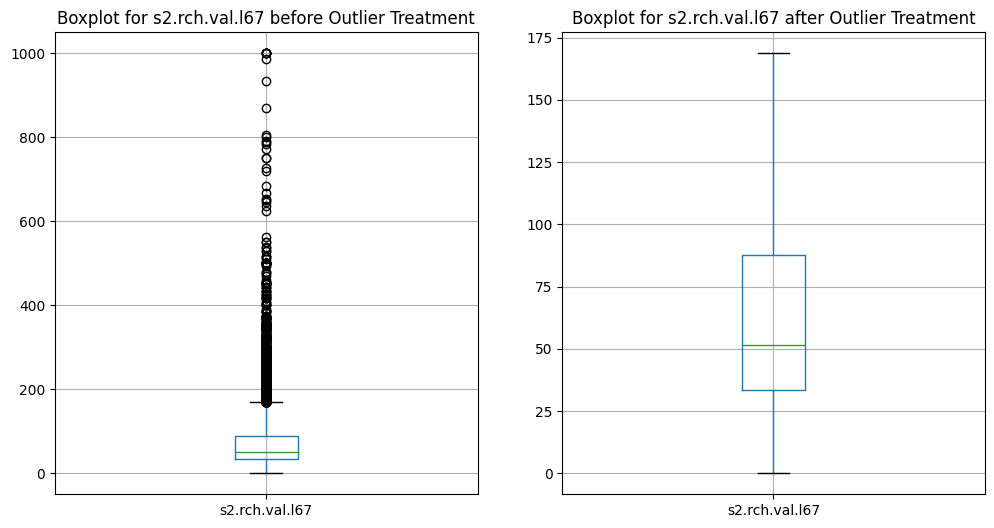



s7.s4.day.no.mou.p2.p4: 0 outliers below and 0 outliers above


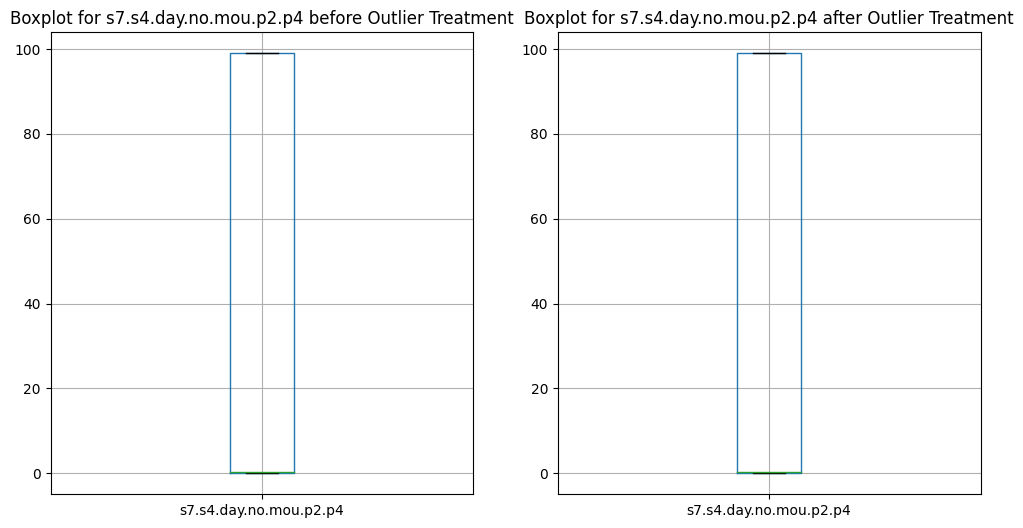



s3.new.rev.p3: 0 outliers below and 1722 outliers above


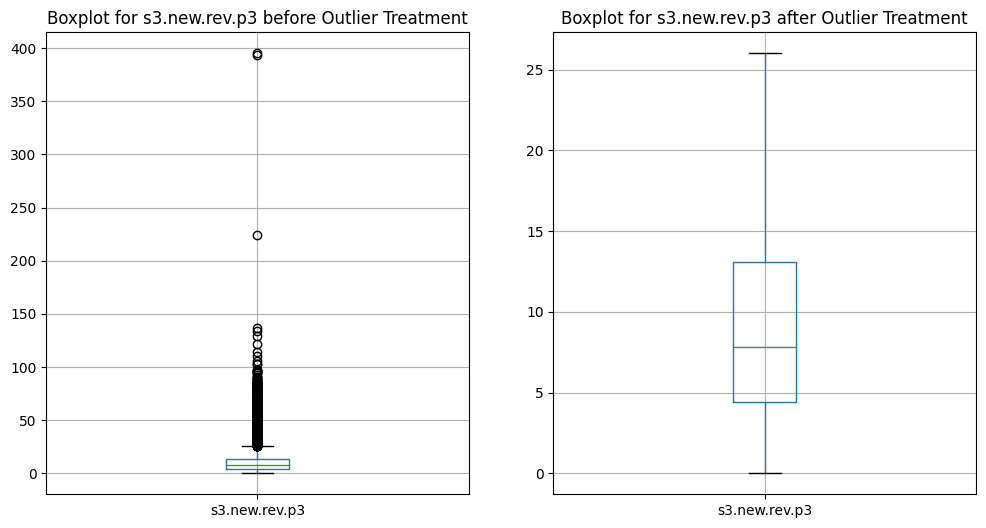



s7.s5.s4.day.nomou.p4: 0 outliers below and 0 outliers above


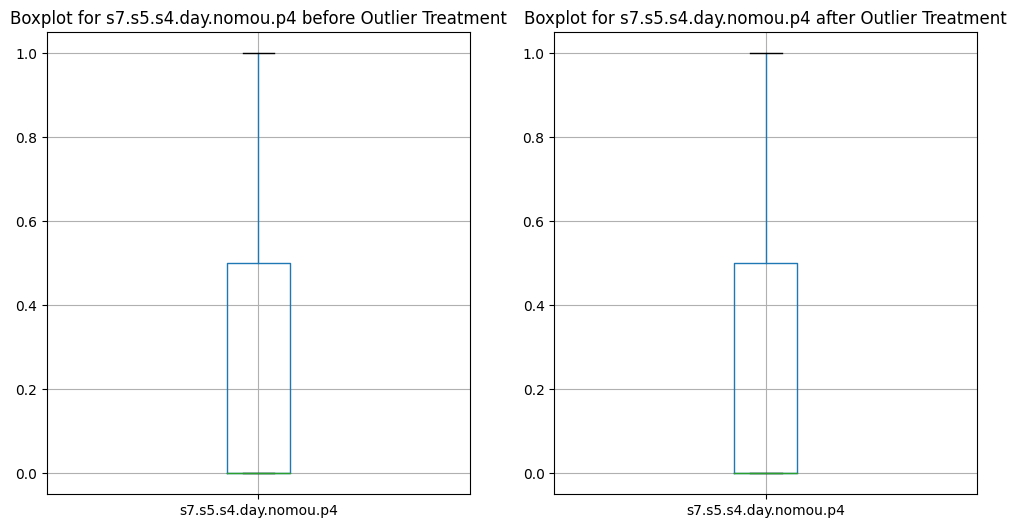



s8.og.rev.p3: 1375 outliers below and 1193 outliers above


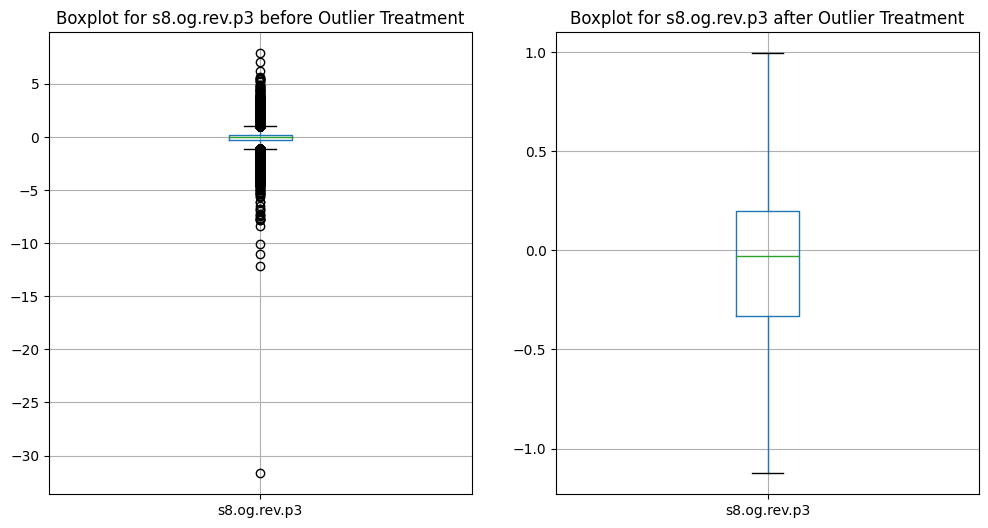



s8.ic.mou.all.p3: 1412 outliers below and 1247 outliers above


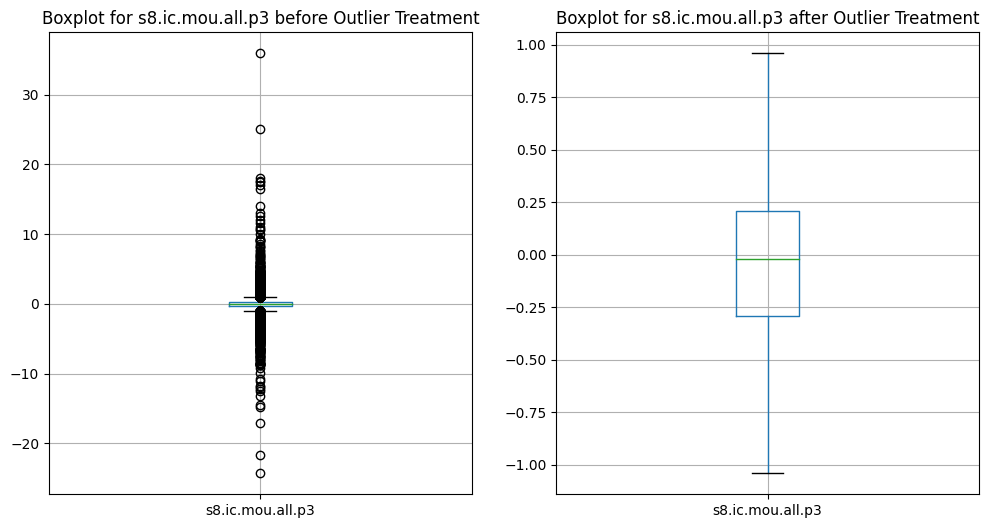



target: 0 outliers below and 0 outliers above


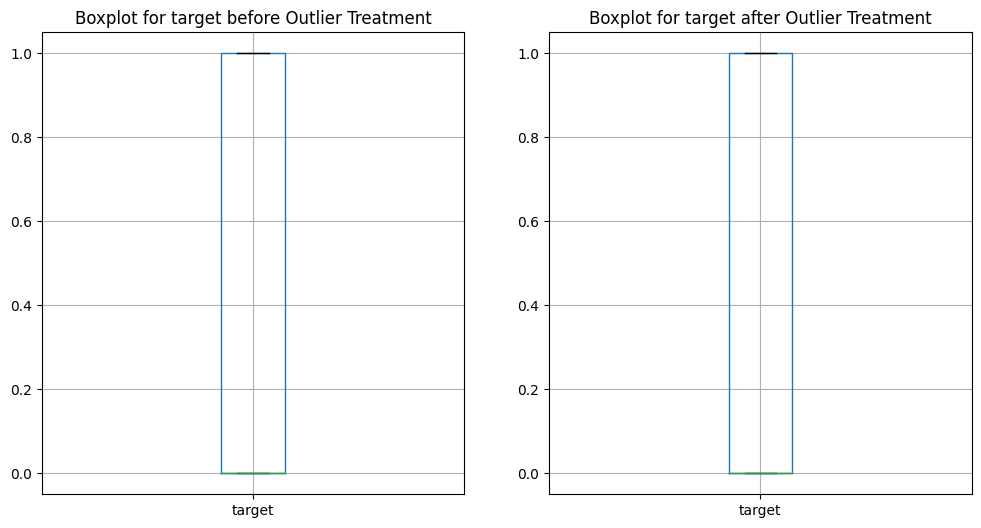



s7.new.rev.p2.p6: 0 outliers below and 421 outliers above


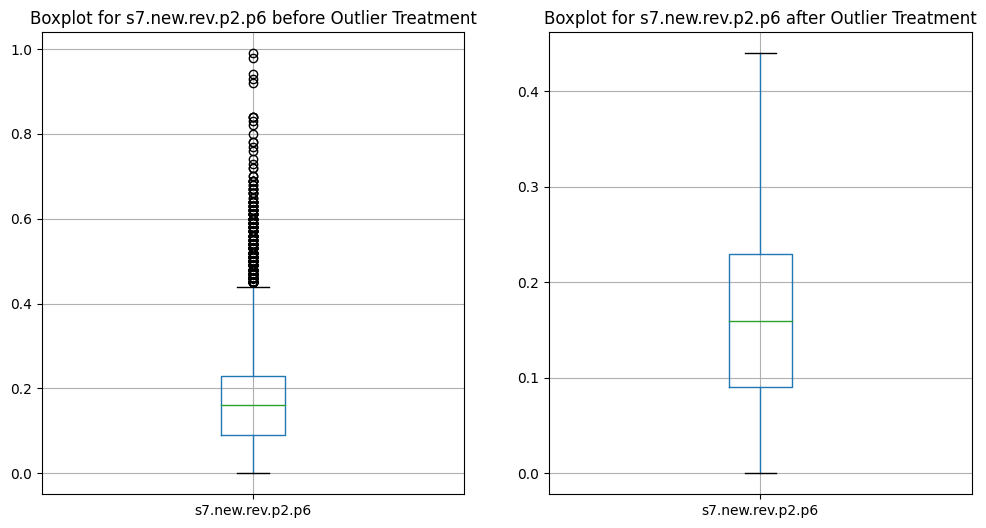



s6.rtd.mou.p2.m2: 0 outliers below and 1114 outliers above


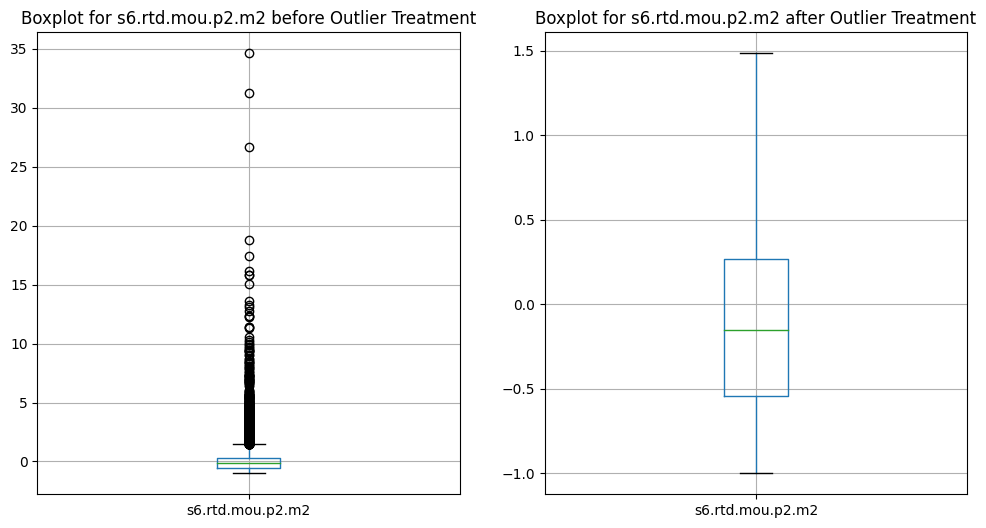



s7.rtd.mou.p2.p6: 0 outliers below and 563 outliers above


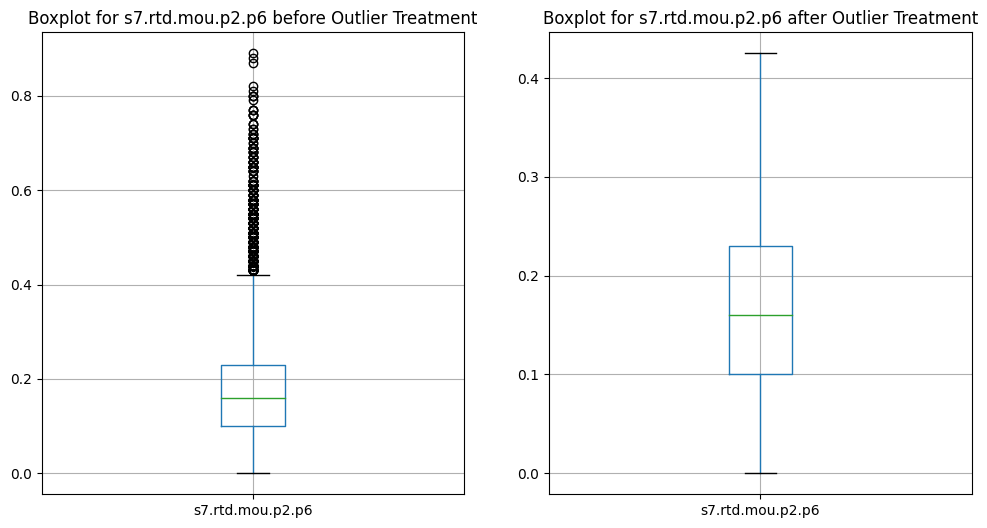



s1.new.rev.p2: 0 outliers below and 1697 outliers above


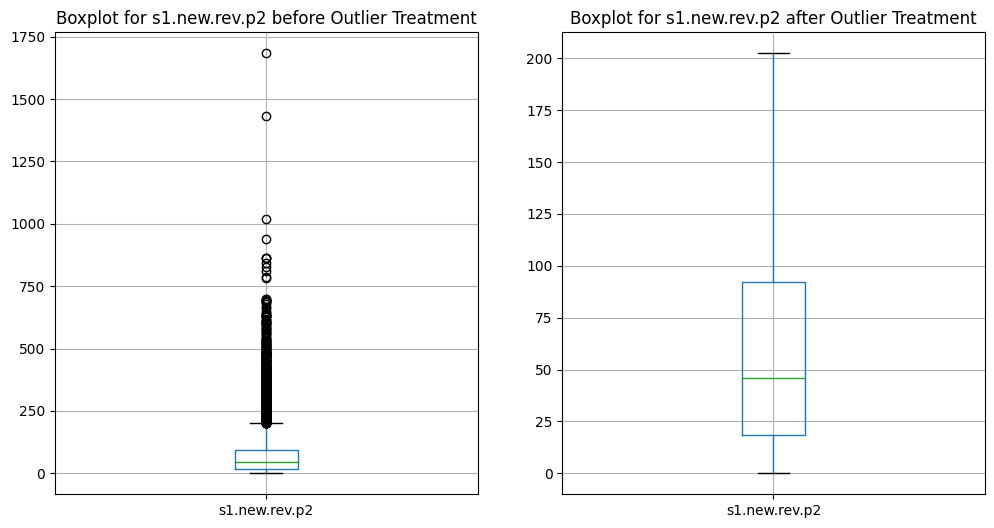



s1.new.rev.p1: 0 outliers below and 1610 outliers above


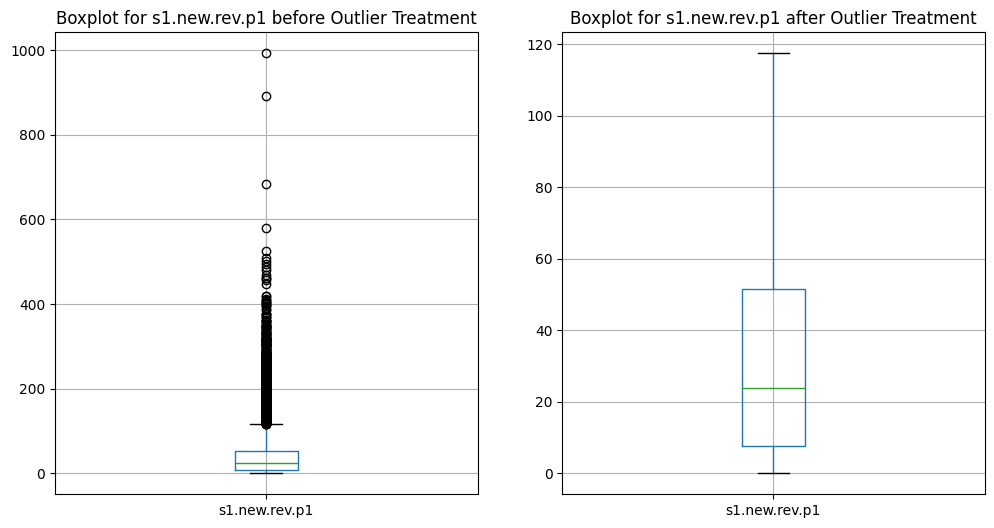



s1.og.hom.mou.p1: 0 outliers below and 1923 outliers above


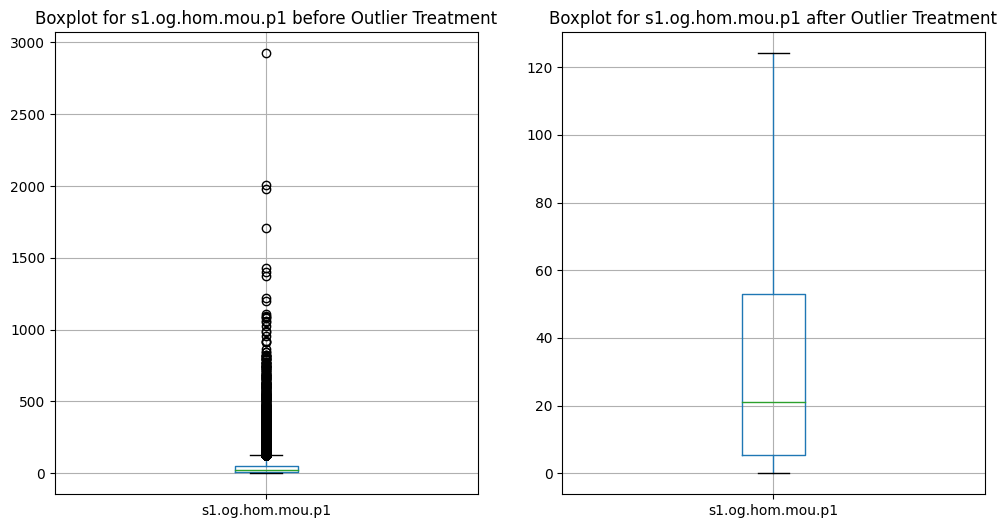



s7.rev.p2.p6: 41 outliers below and 454 outliers above


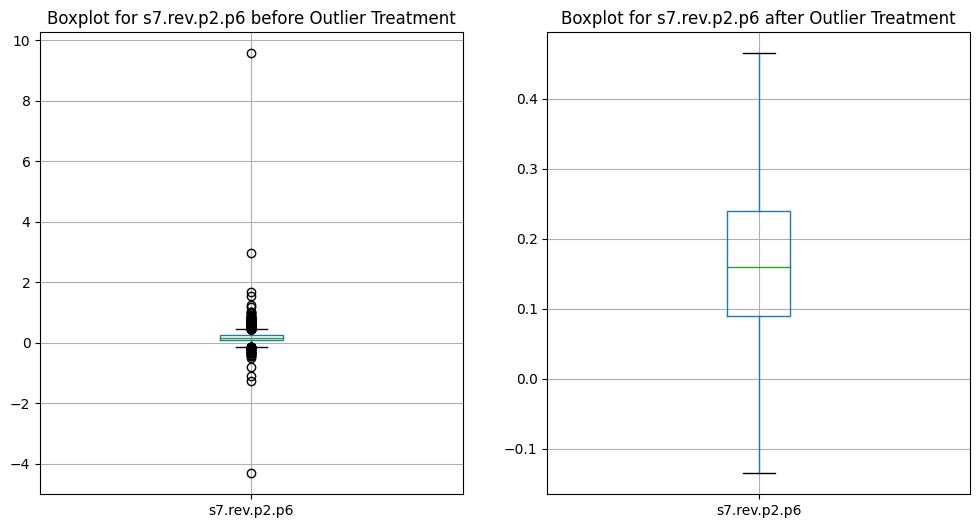



s1.og.hom.rev.p2: 0 outliers below and 1509 outliers above


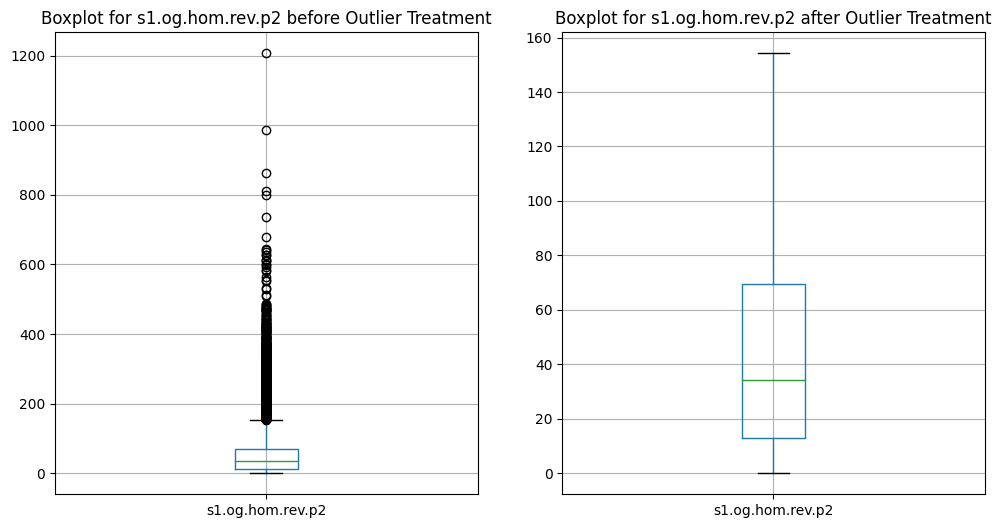



s1.rtd.mou.p1: 0 outliers below and 1925 outliers above


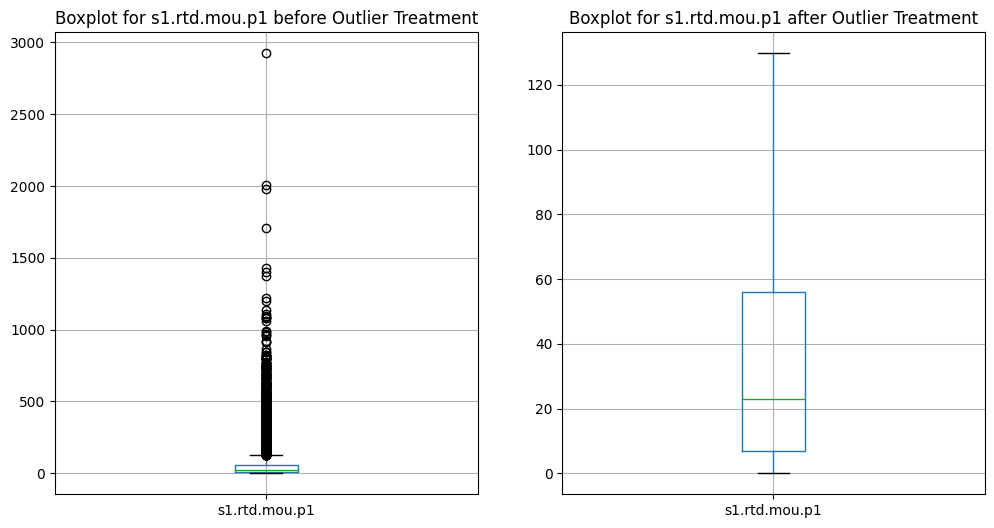



s1.og.rev.all.p1: 0 outliers below and 1537 outliers above


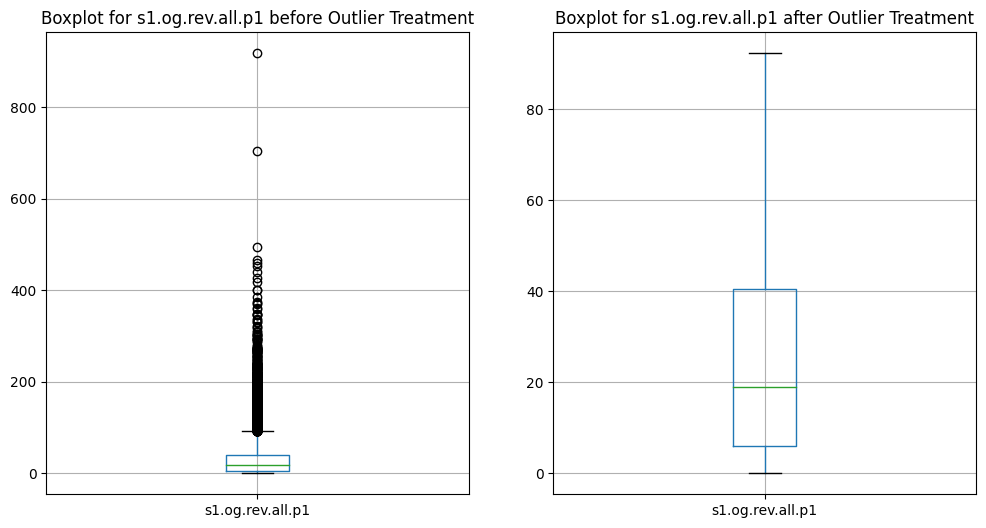



s1.og.mou.all.p1: 0 outliers below and 1914 outliers above


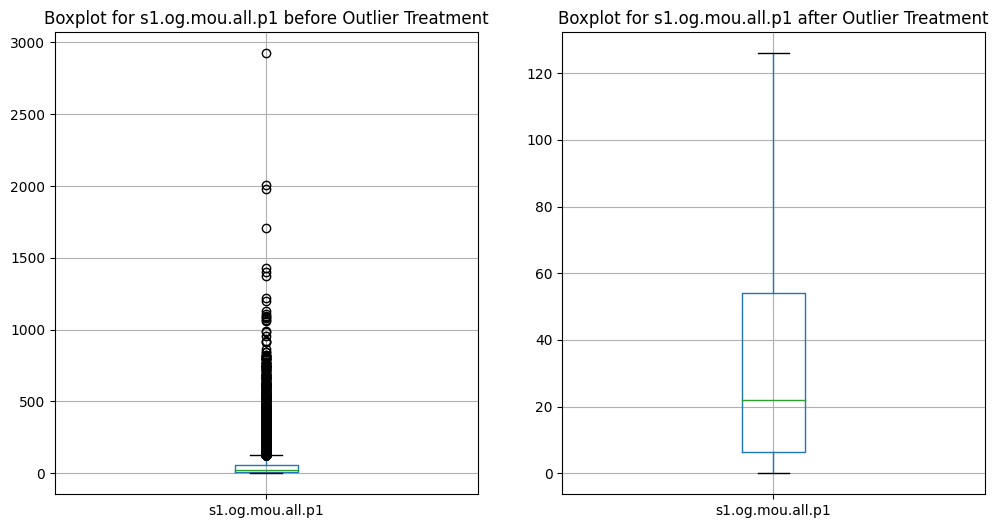



s3.og.rev.all.p1: 0 outliers below and 1559 outliers above


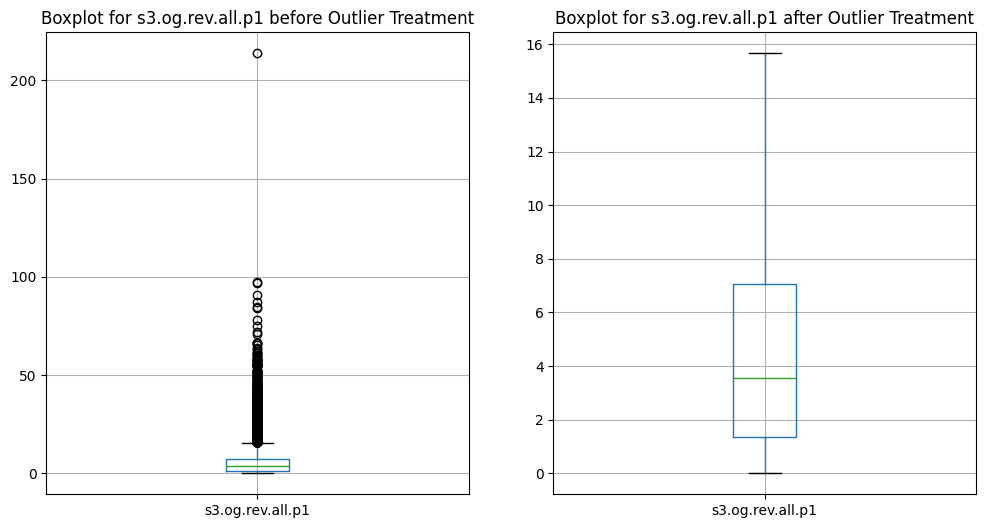



s7.new.rev.p3.p6: 840 outliers below and 501 outliers above


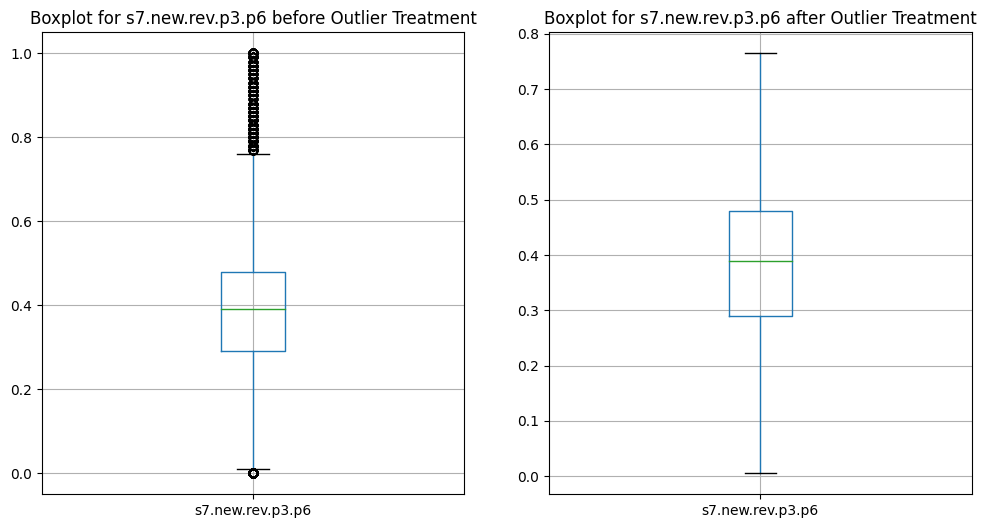



ds.usg.p6: 0 outliers below and 5988 outliers above


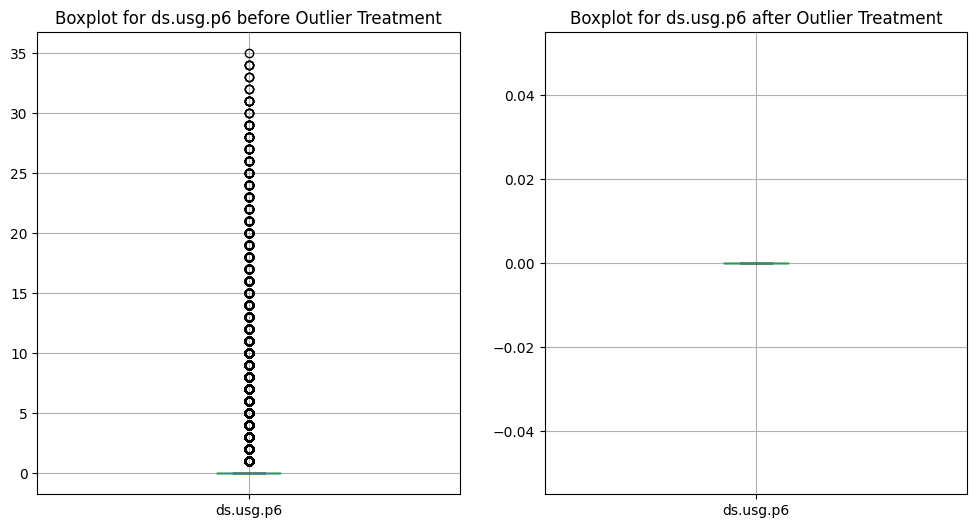



snd.dec.p2: 0 outliers below and 1500 outliers above


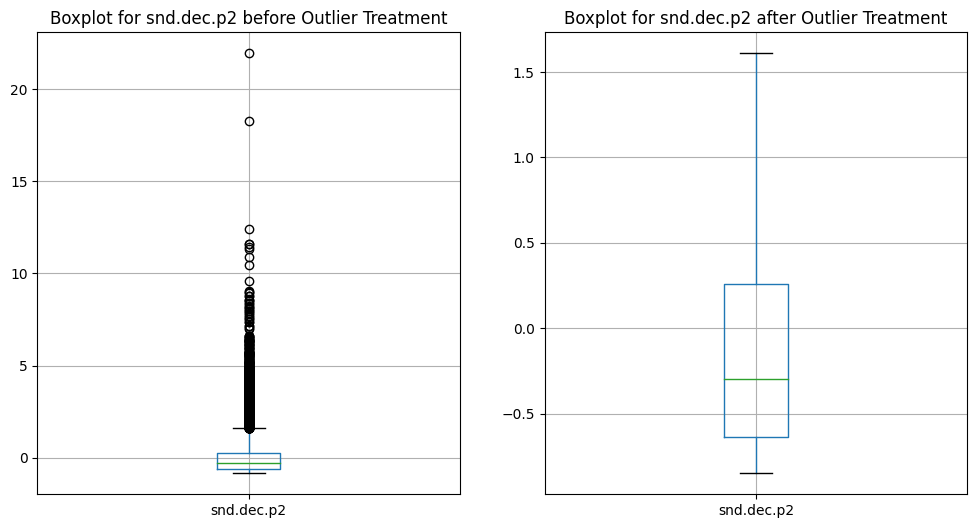



s3.og.mou.all.p1: 0 outliers below and 1941 outliers above


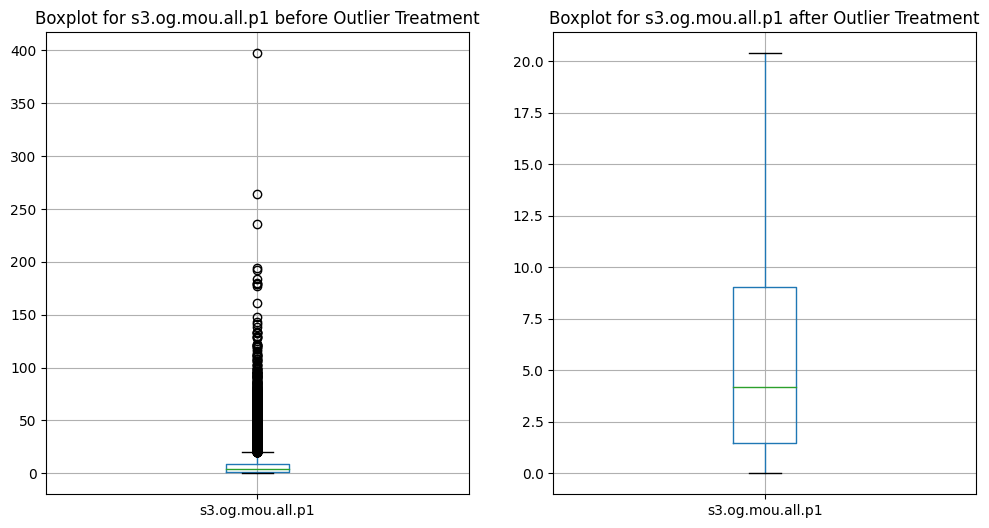



ds.og.usg.p4: 0 outliers below and 6230 outliers above


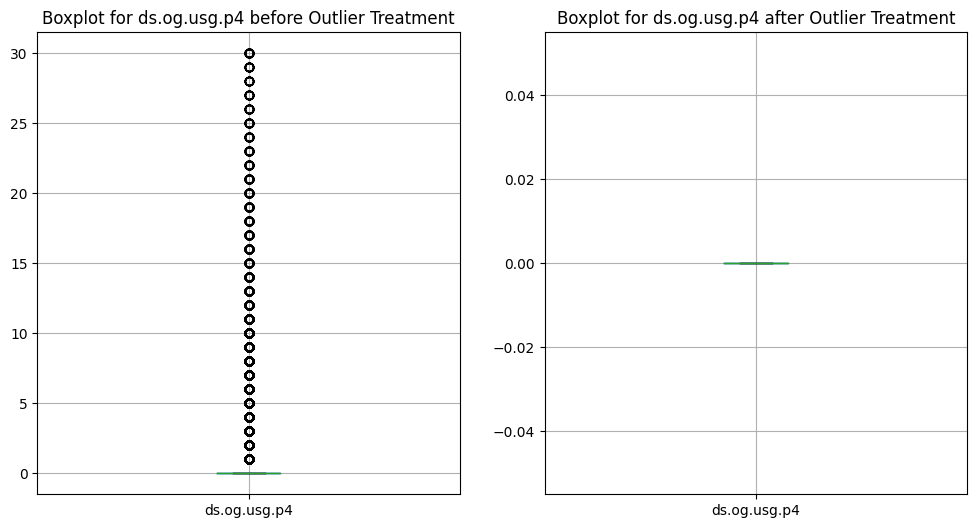



s1.og.mou.all.p2: 0 outliers below and 1875 outliers above


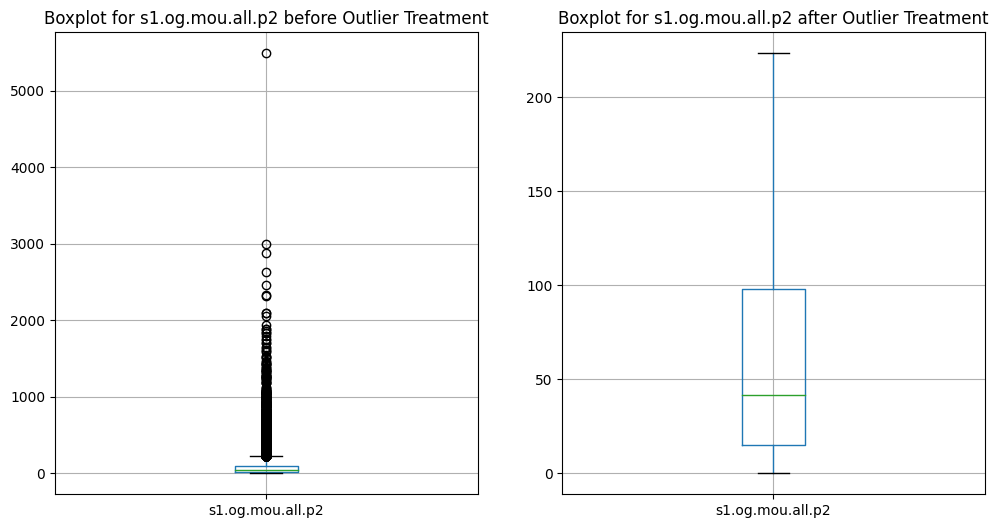



s8.og.rev.p6: 1061 outliers below and 953 outliers above


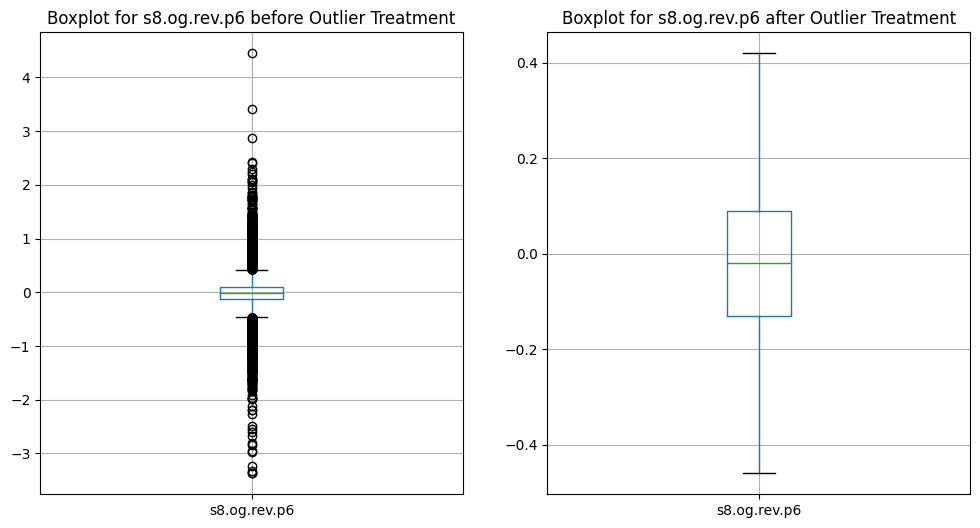



s1.og.hom.mou.p2: 0 outliers below and 1875 outliers above


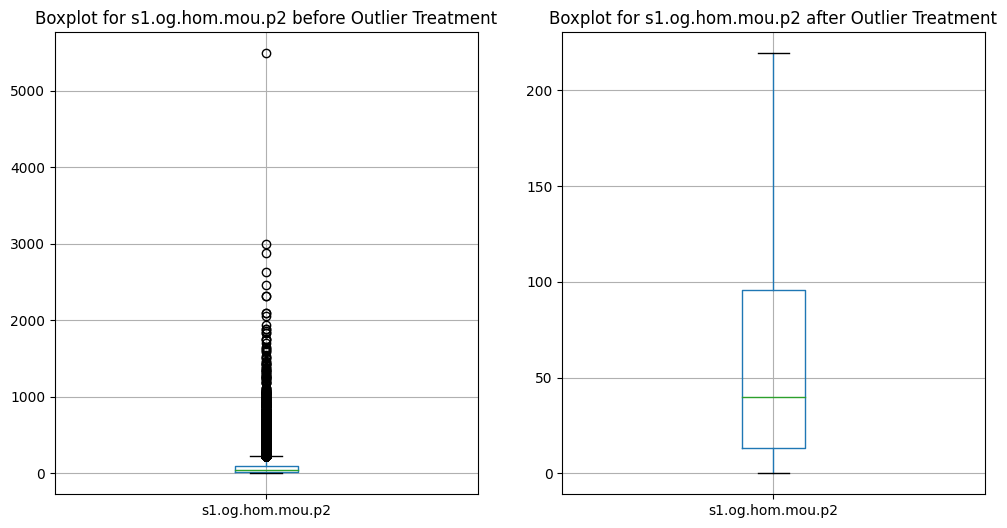



s5.og.rev.all.p1: 0 outliers below and 1416 outliers above


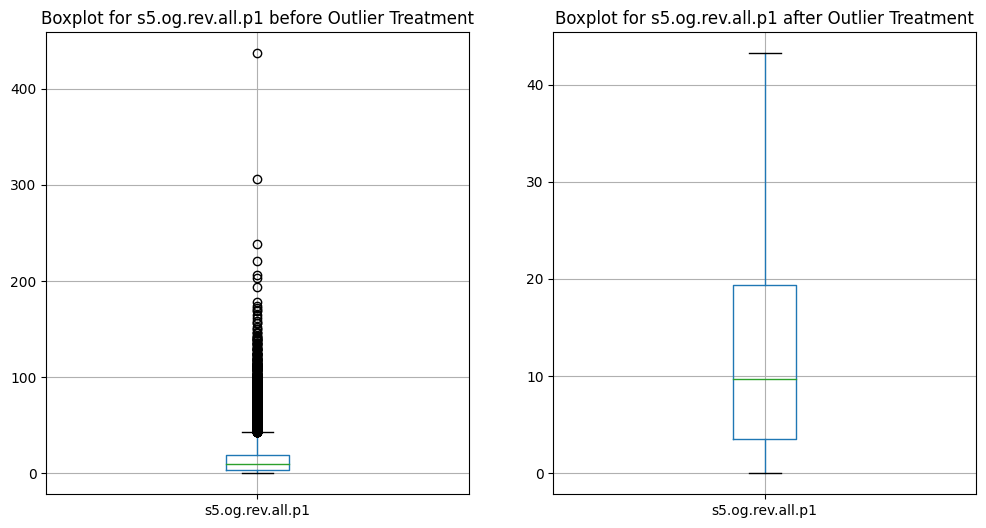



s1.og.rev.all.p2: 0 outliers below and 1524 outliers above


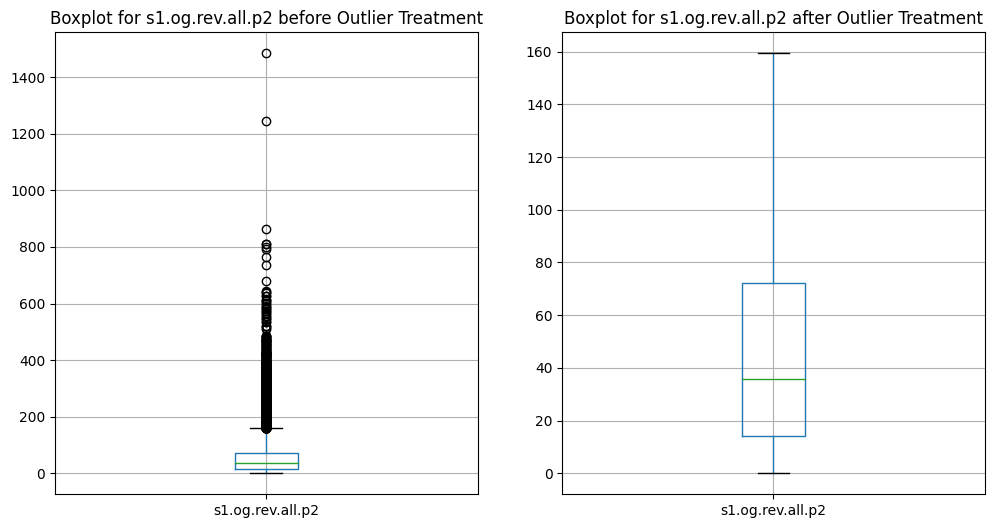



s1.rtd.mou.p2: 0 outliers below and 1881 outliers above


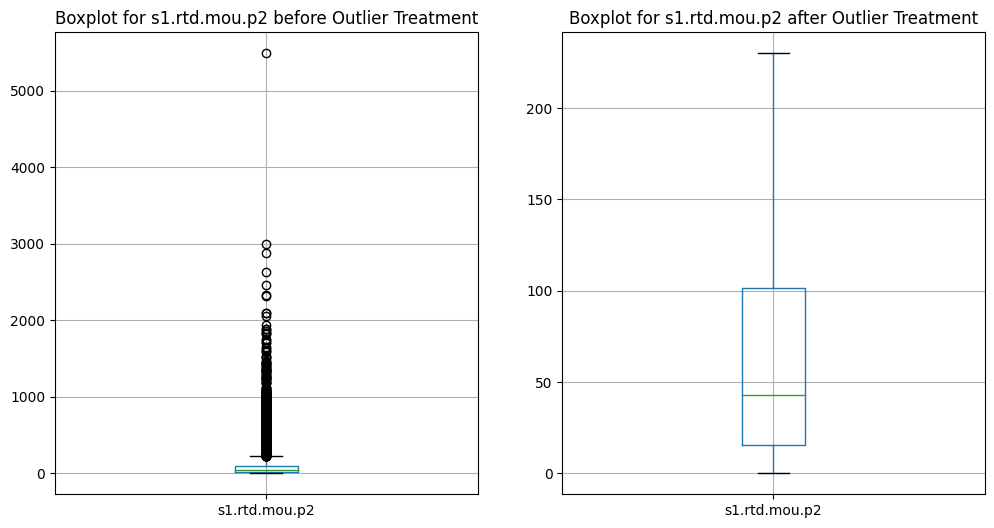



s5.rtd.mou.p1: 0 outliers below and 1912 outliers above


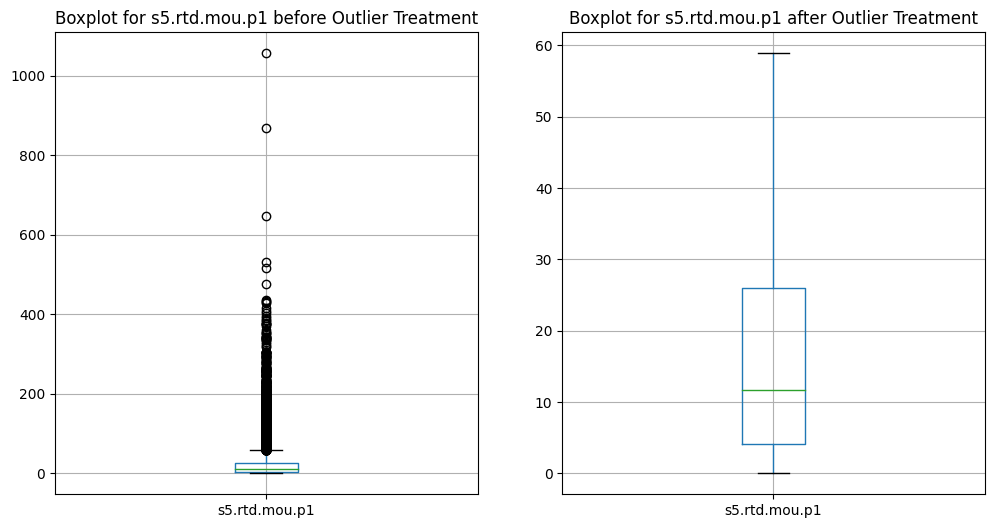



s1.og.mou.any.p2: 0 outliers below and 1878 outliers above


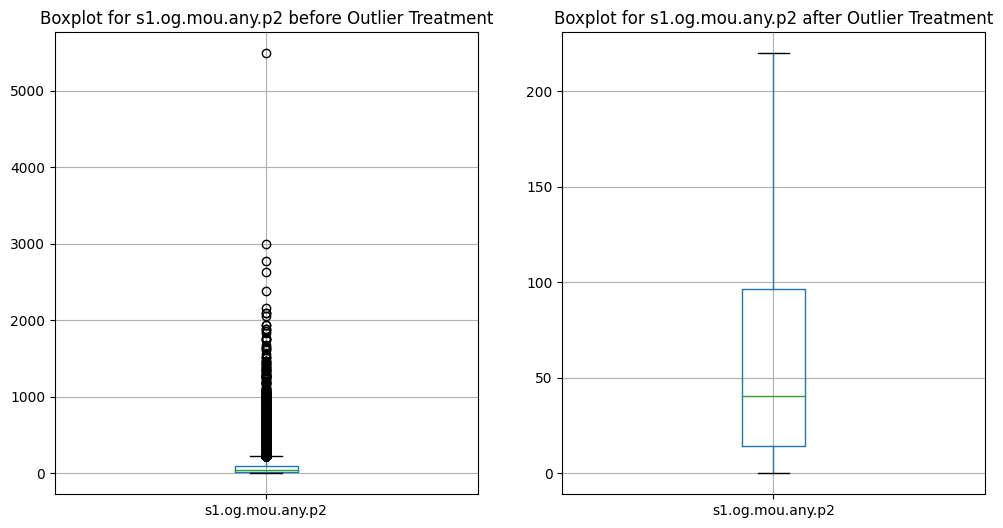



s4.day.no.mou.p2: 0 outliers below and 0 outliers above


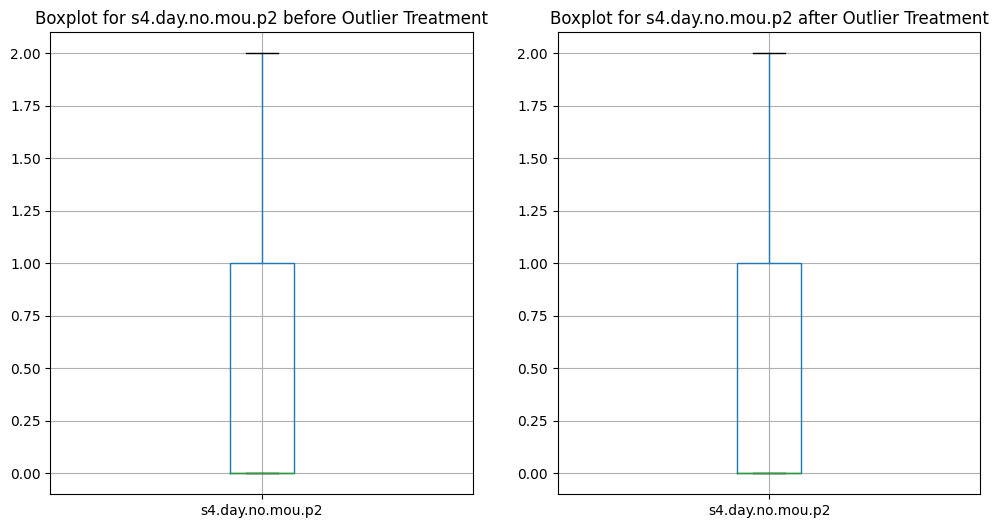



s1.hom.rmg.rev.p2: 0 outliers below and 1524 outliers above


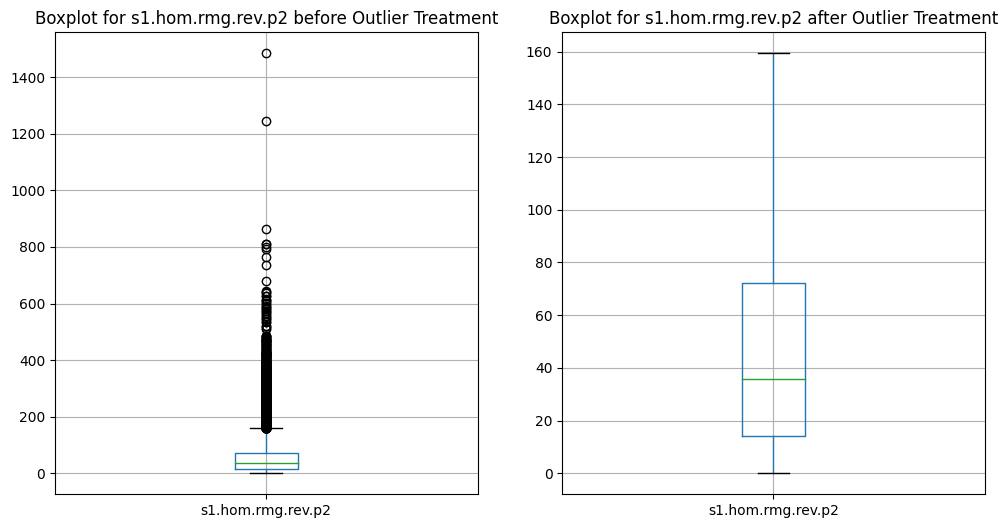



s7.rtd.mou.p3.p6: 764 outliers below and 633 outliers above


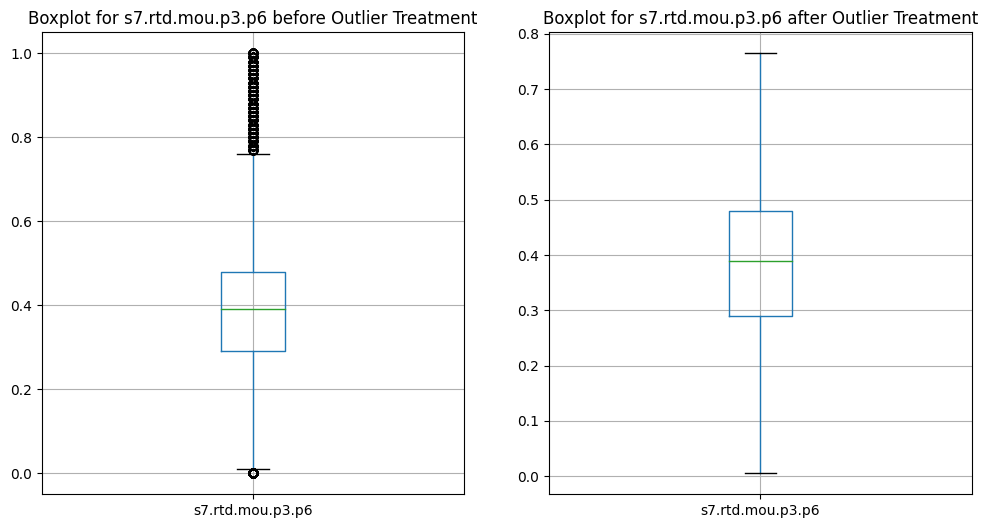



s5.og.mou.all.p1: 0 outliers below and 1893 outliers above


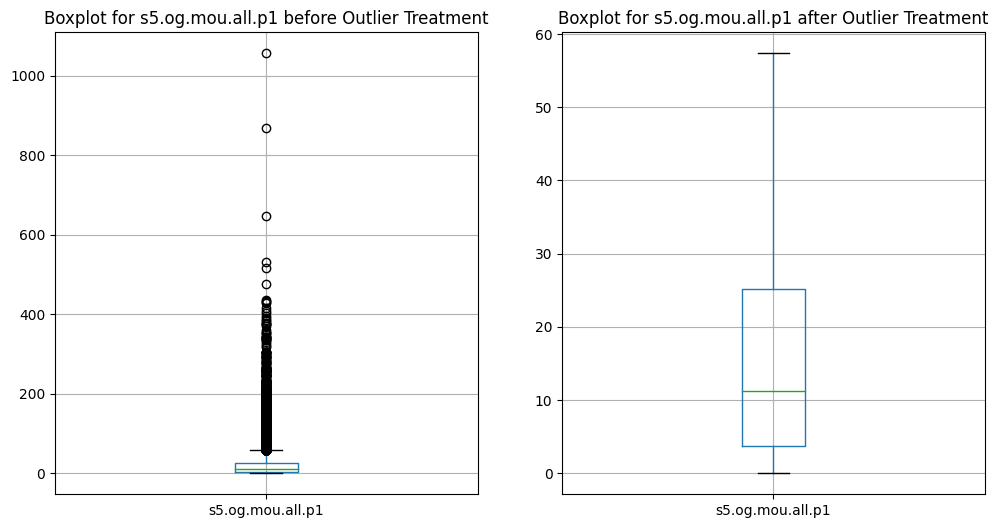



s5.og.hom.mou.p1: 0 outliers below and 1908 outliers above


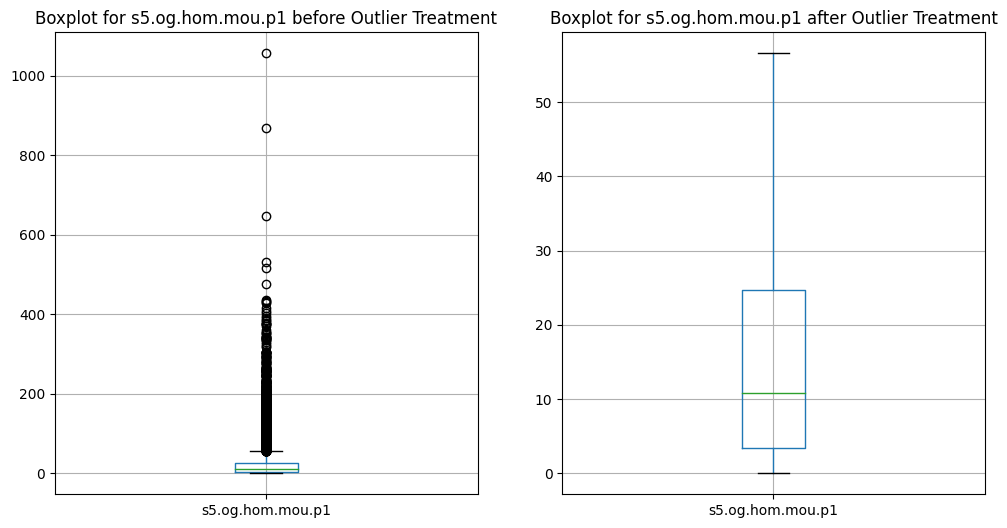



s3.new.rev.p1: 0 outliers below and 1738 outliers above


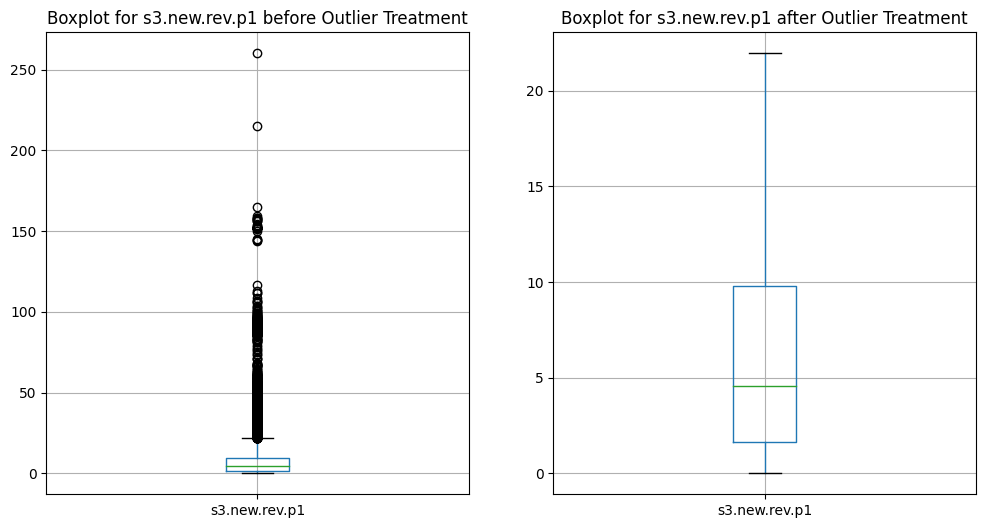



s4.usg.ins.p1: 4009 outliers below and 0 outliers above


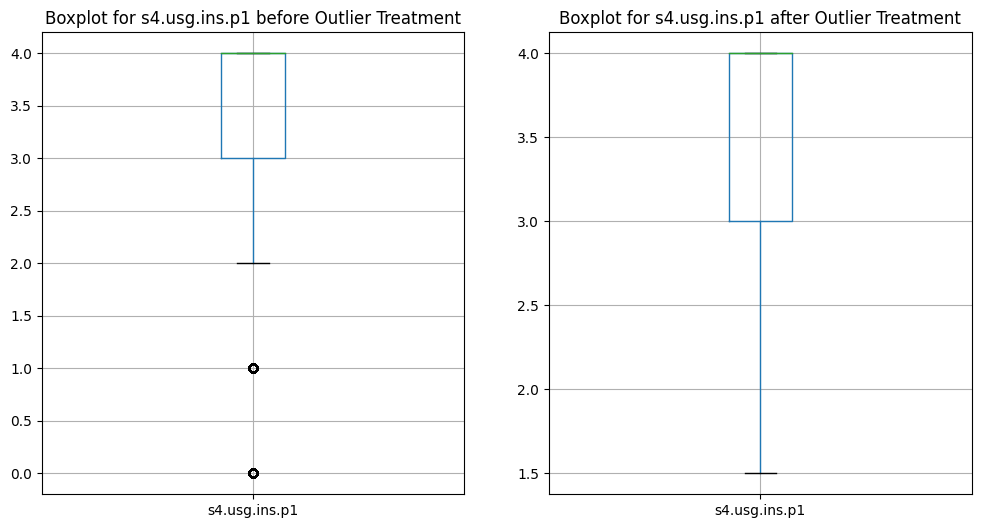



s2.s4.day.no.mou.p2: 0 outliers below and 2036 outliers above


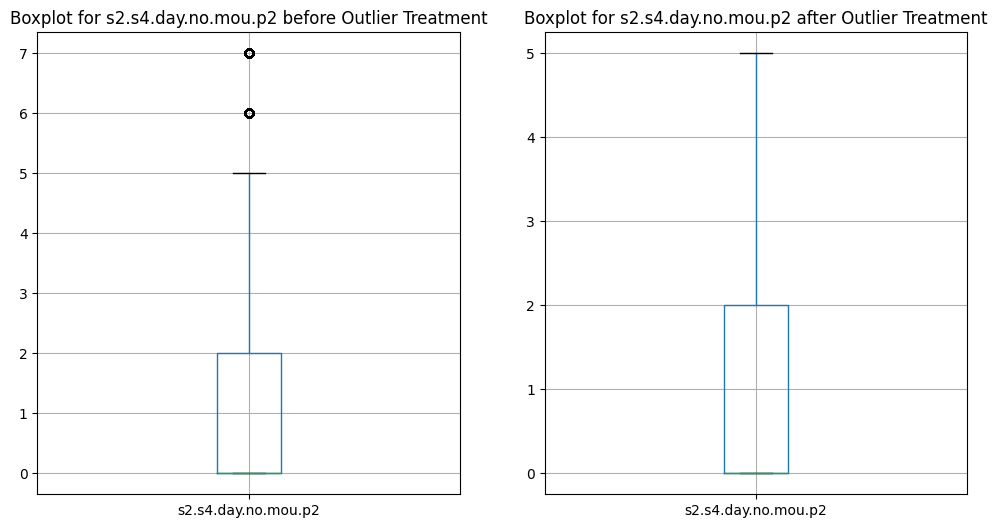



s7.new.rev.l21.p6: 1126 outliers below and 584 outliers above


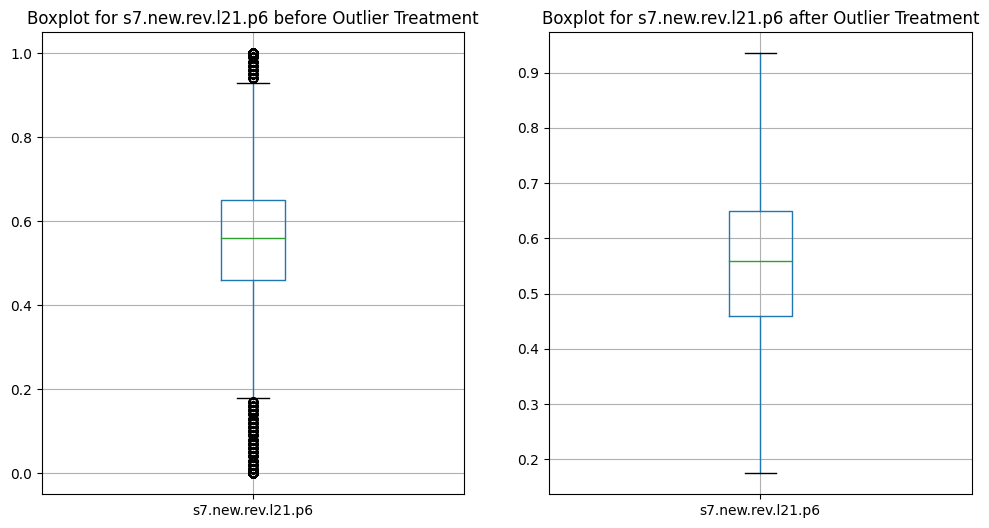



s5.rev.p1: 0 outliers below and 1862 outliers above


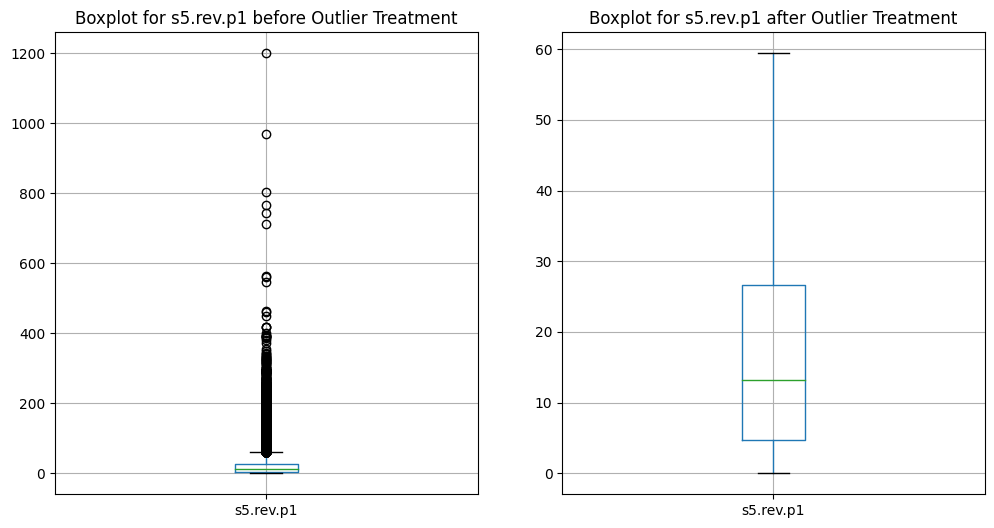



s5.s4.day.no.mou.p2: 0 outliers below and 2036 outliers above


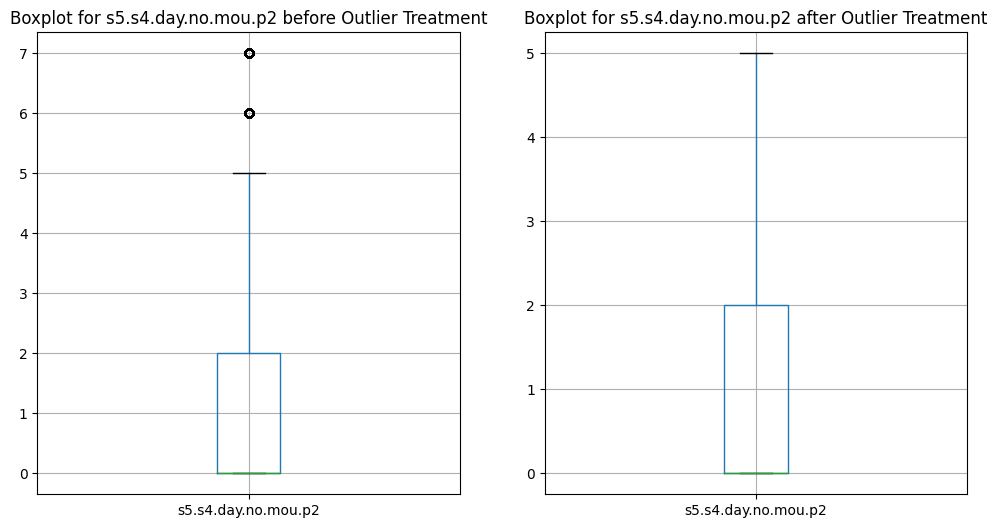



tot.s4.day.no.mou.p2: 0 outliers below and 2452 outliers above


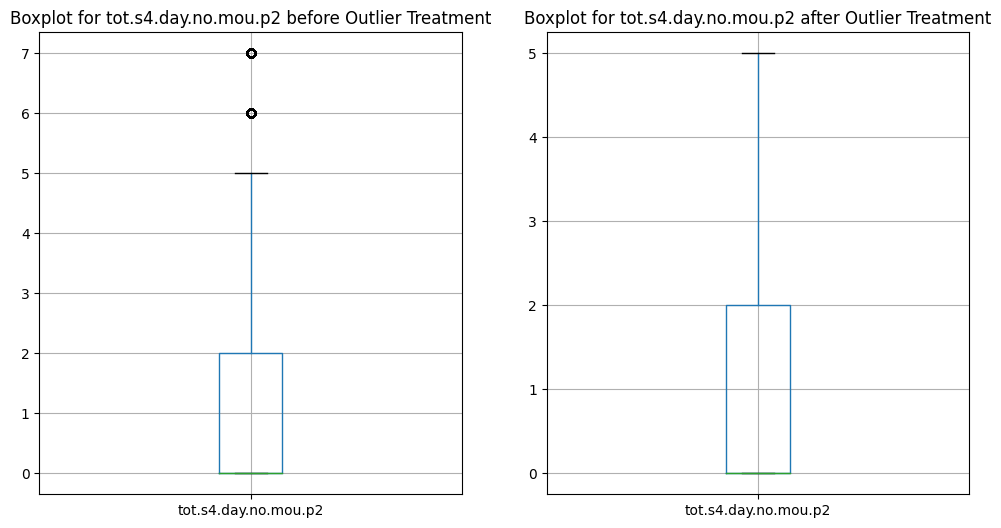



s8.new.rev.p3: 1426 outliers below and 1287 outliers above


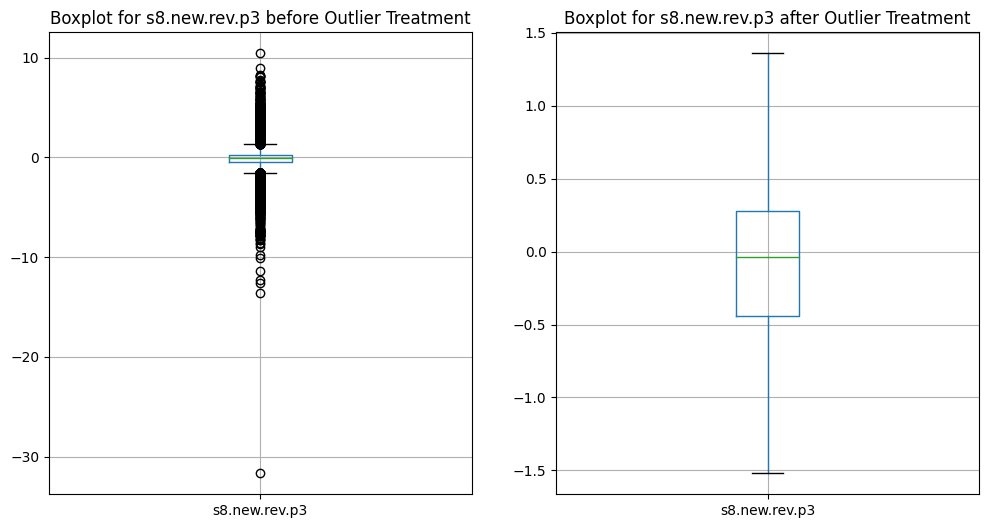



s3.og.mou.all.p2: 0 outliers below and 1923 outliers above


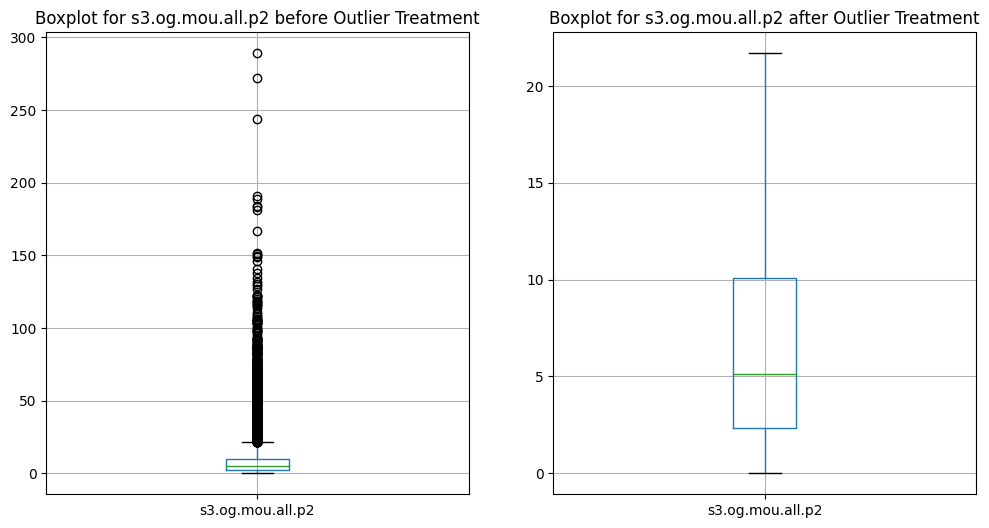



s1.rev.p1: 8 outliers below and 1831 outliers above


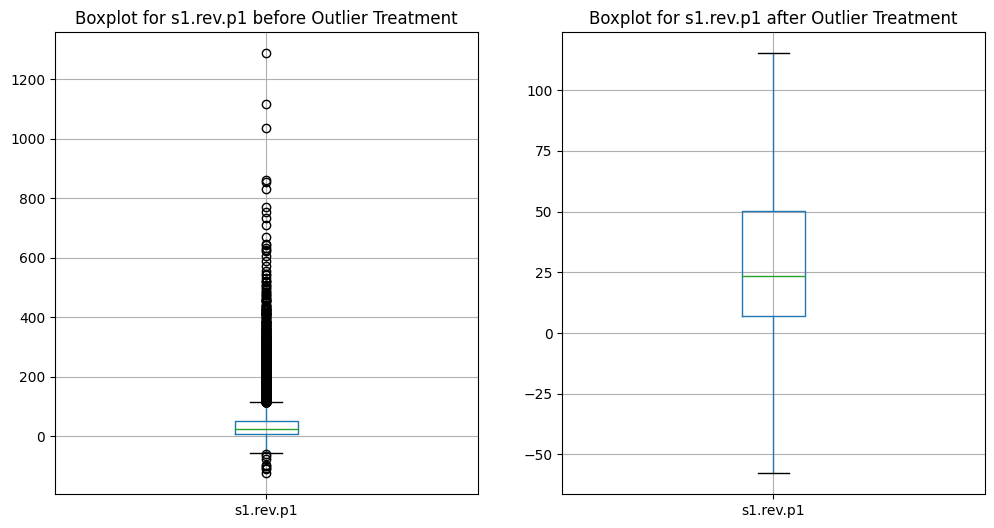



s4.loc.og.ins.p1: 0 outliers below and 0 outliers above


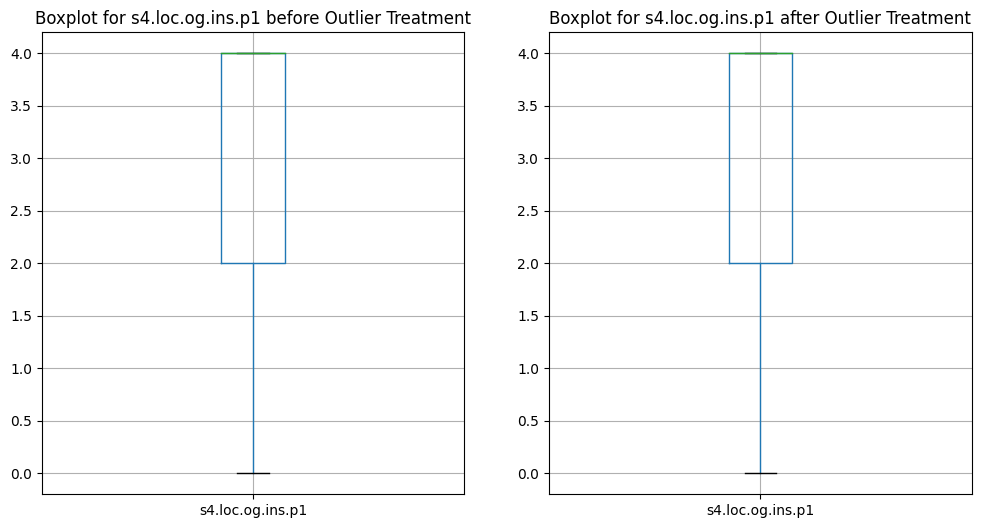



s1.loc.og.mou.p1: 0 outliers below and 1915 outliers above


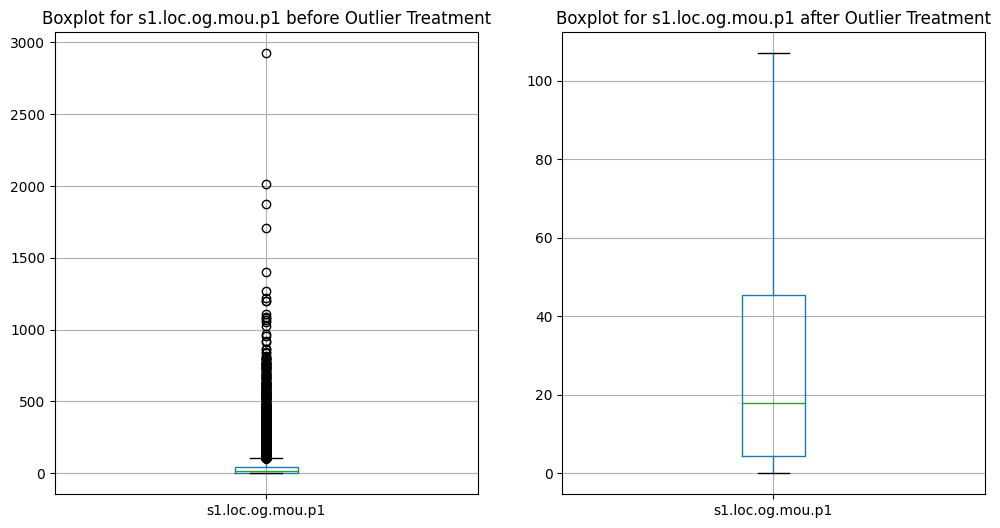



s4.og.any.p2: 0 outliers below and 1507 outliers above


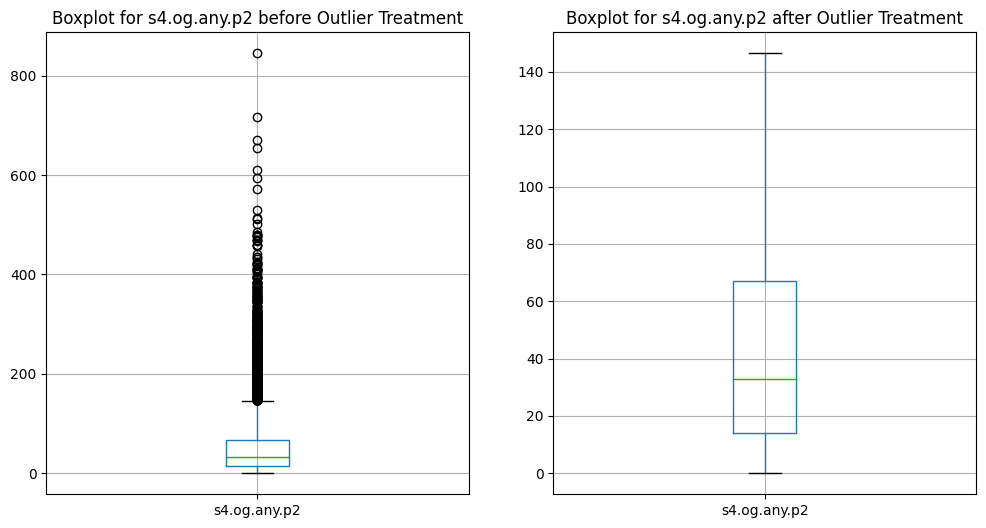



prop.og.mou.any.p2: 0 outliers below and 0 outliers above


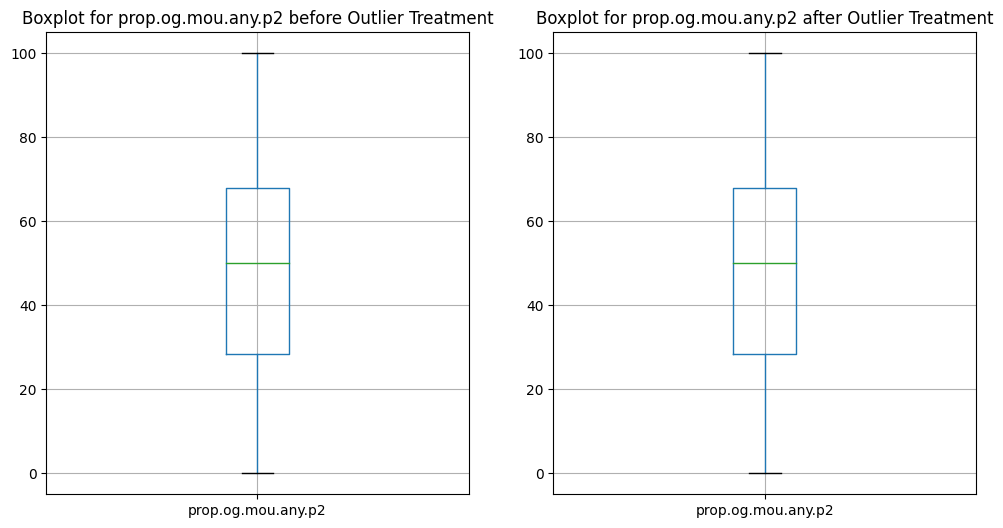



s4.low.blnc.ins.p3: 0 outliers below and 0 outliers above


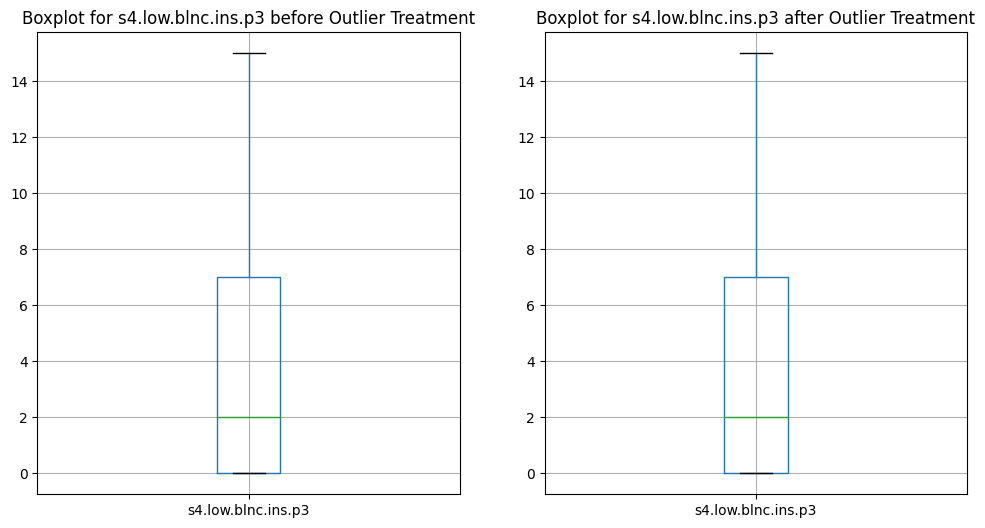



s1.loc.og.mou.p2: 0 outliers below and 1910 outliers above


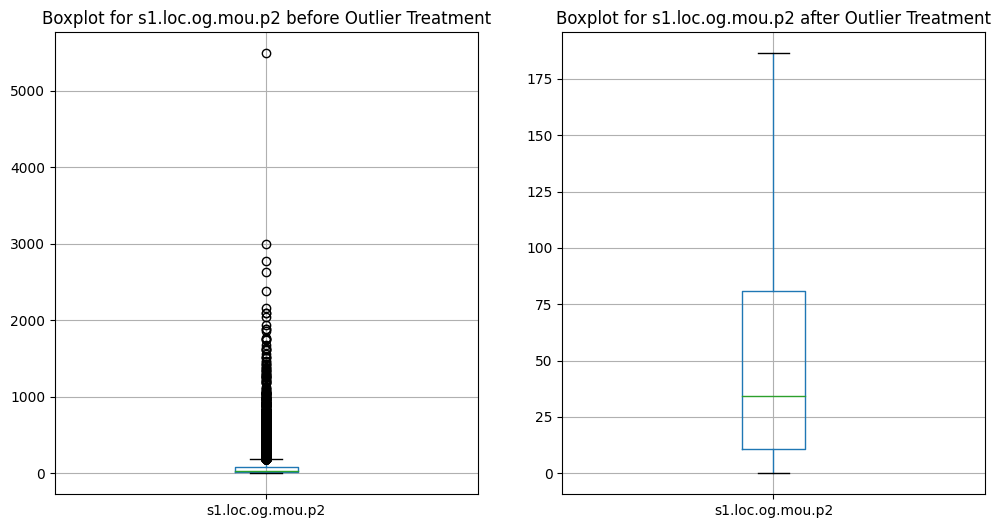



s5.new.rev.p2: 0 outliers below and 1561 outliers above


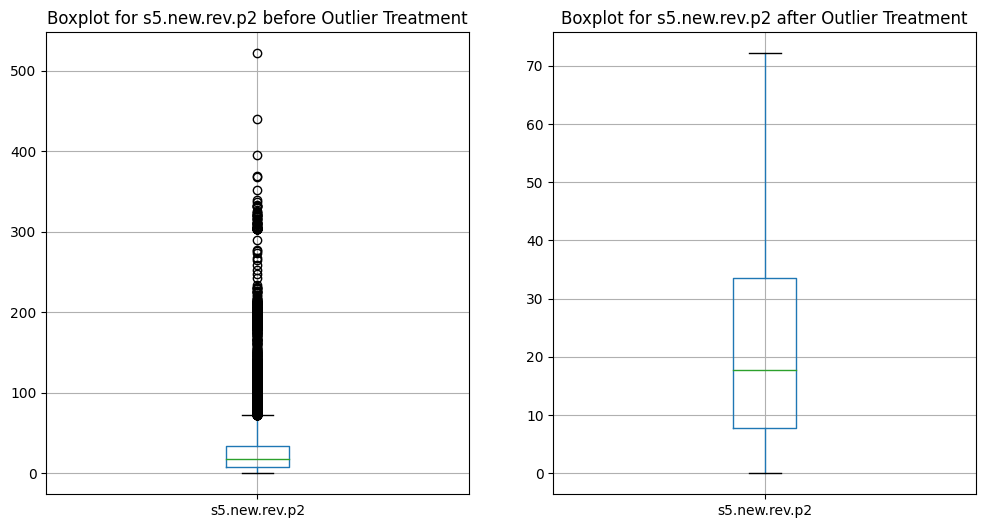



s5.new.rev.p1: 0 outliers below and 1511 outliers above


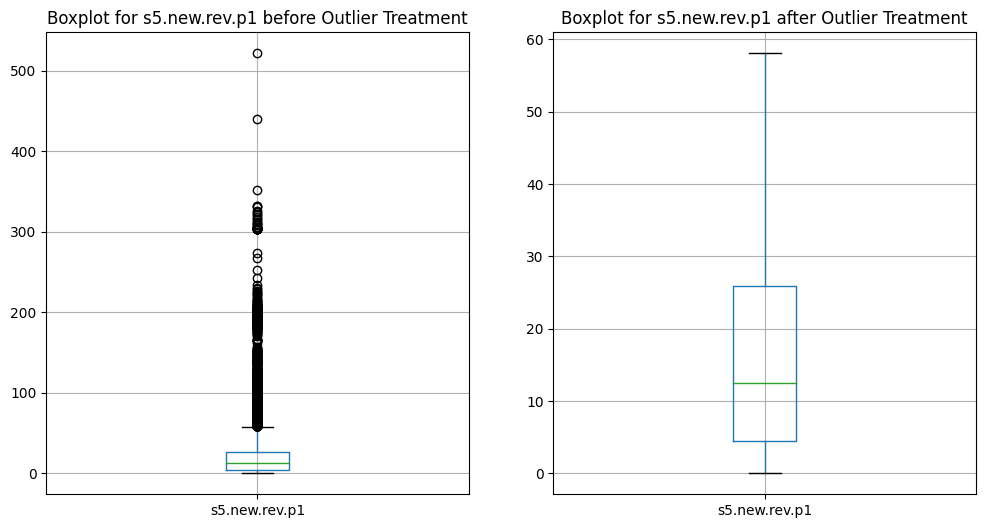



s4.low.blnc.ins.l14: 0 outliers below and 0 outliers above


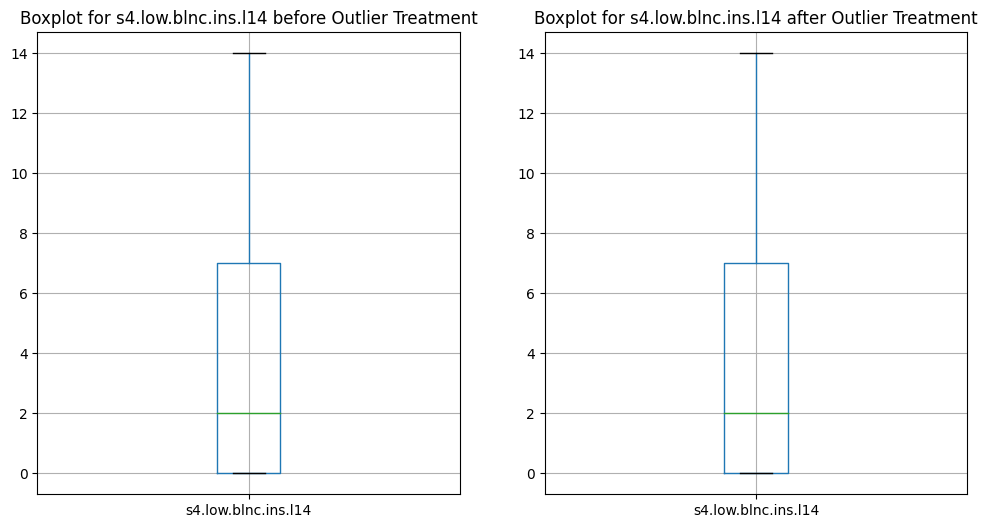



s3.og.hom.mou.p1: 0 outliers below and 1928 outliers above


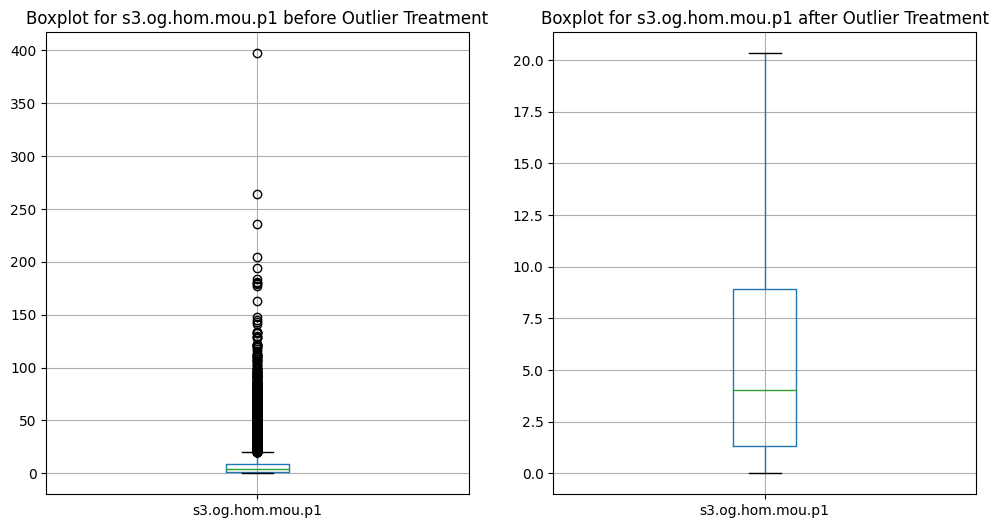



s7.rtd.mou.l21.p6: 1186 outliers below and 640 outliers above


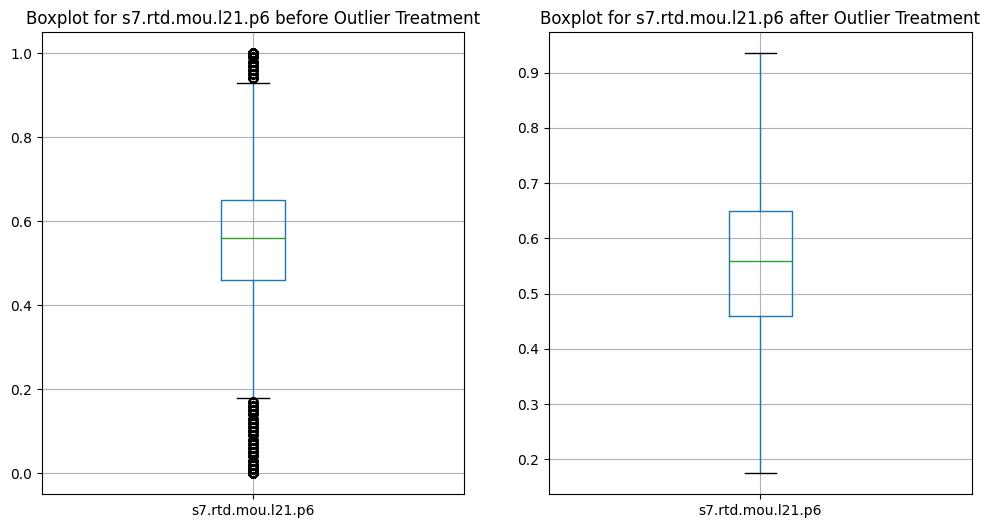



s4.loc.og.ins.l14: 1229 outliers below and 0 outliers above


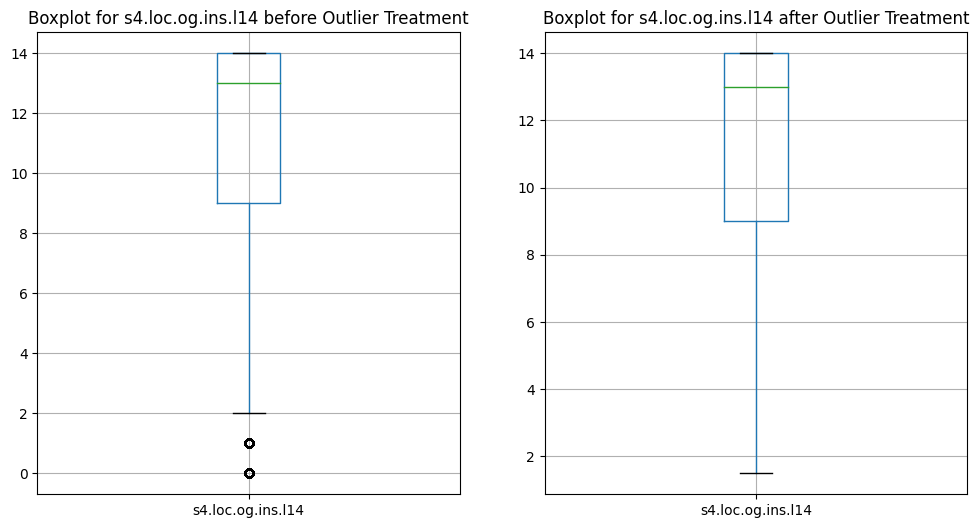



s8.rtd.mou.p3: 1864 outliers below and 1505 outliers above


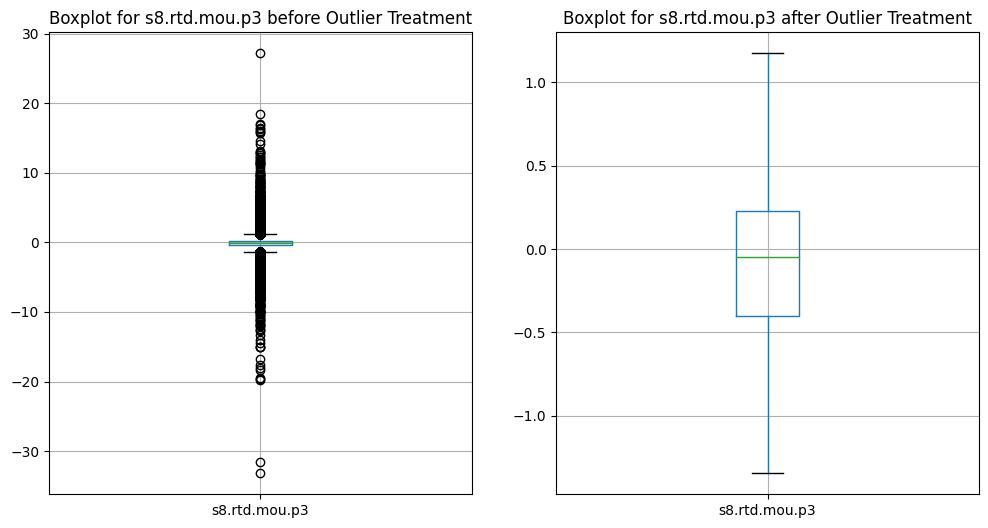



s4.dec.ins.l14: 0 outliers below and 0 outliers above


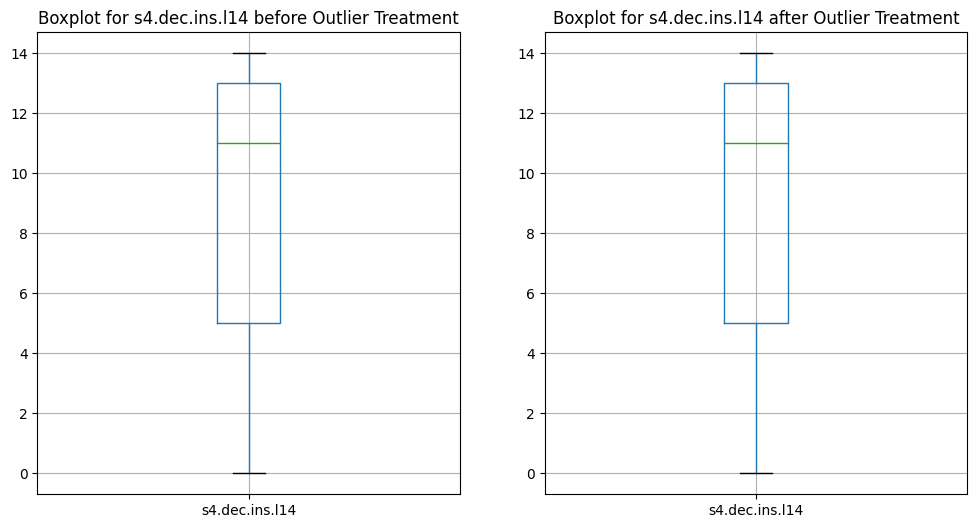



s2.s4.day.no.mou.p3: 0 outliers below and 1989 outliers above


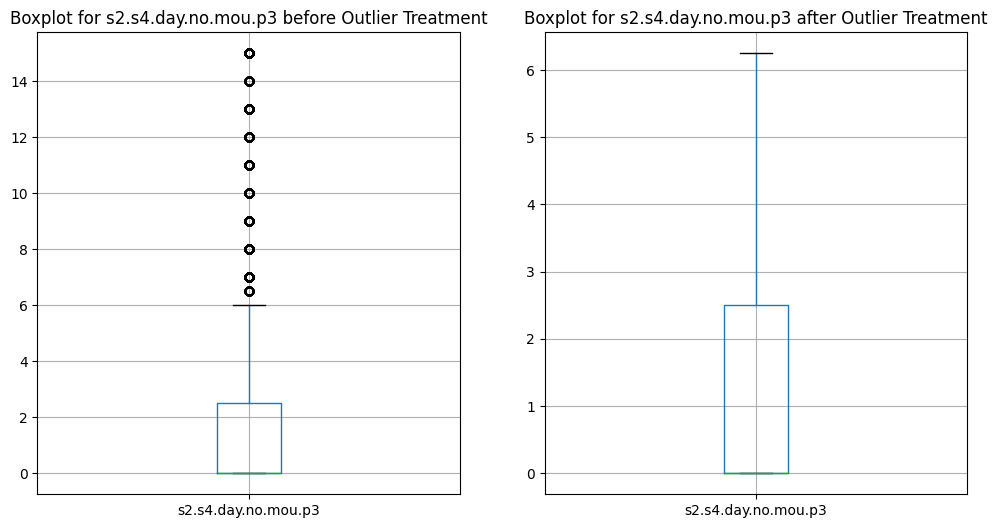



s3.new.rev.p2: 0 outliers below and 1555 outliers above


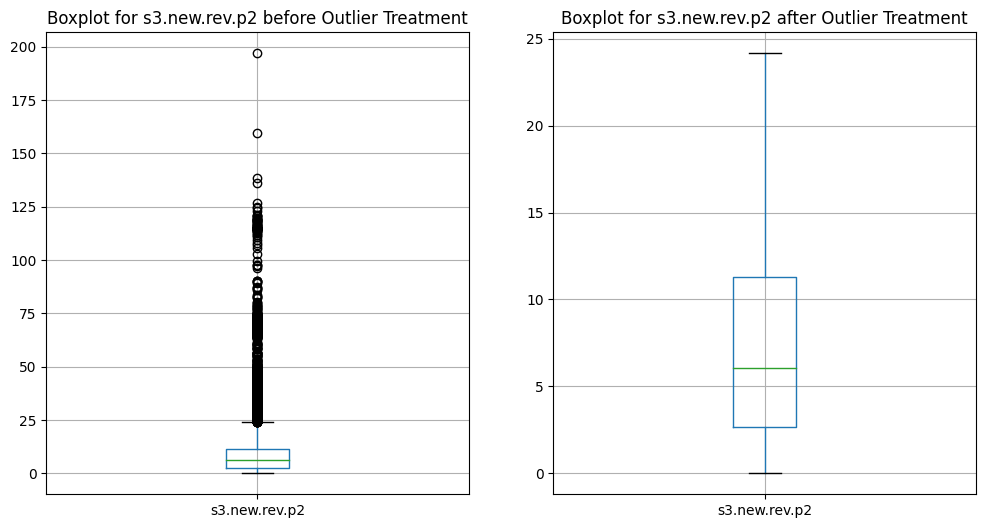



tot.s4.day.no.mou.p3: 0 outliers below and 1226 outliers above


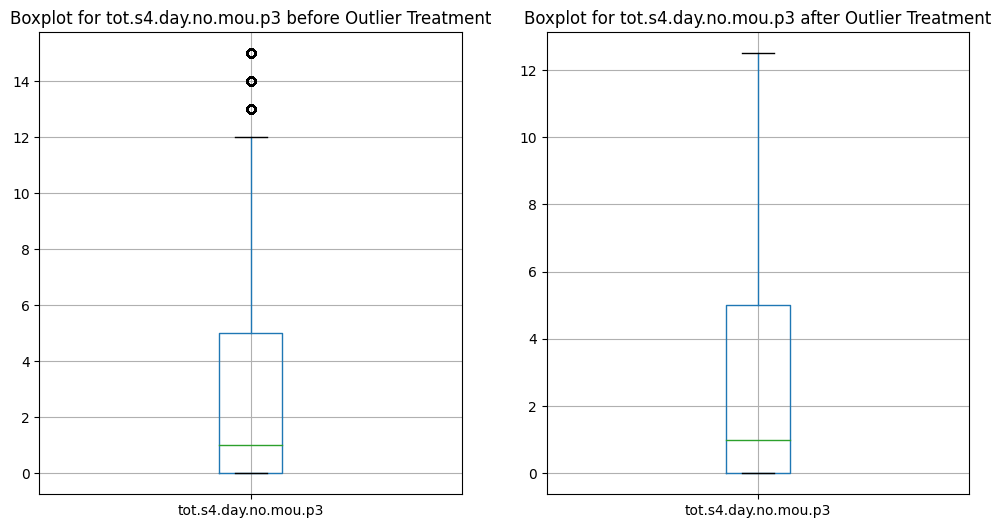



s5.og.mou.all.p2: 0 outliers below and 1886 outliers above


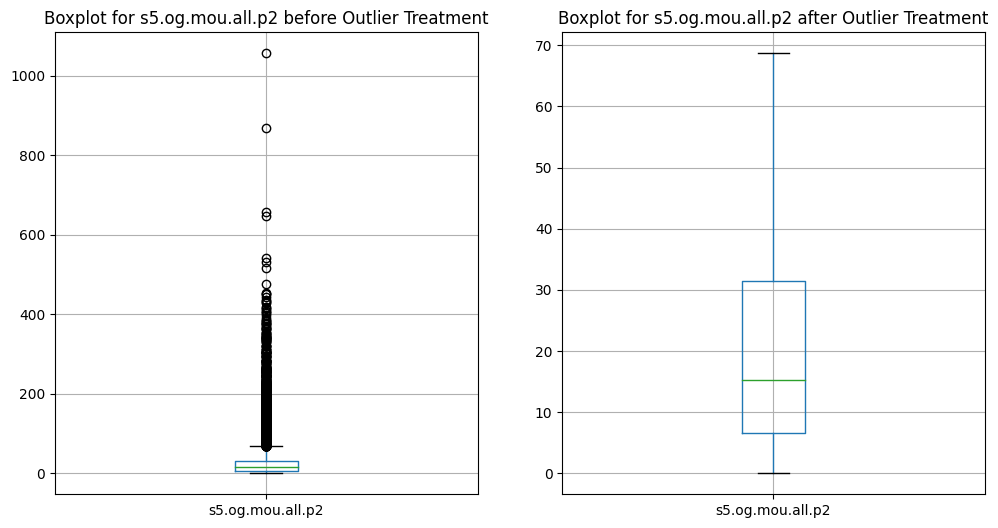



s4.loc.ic.ins.l14: 1351 outliers below and 0 outliers above


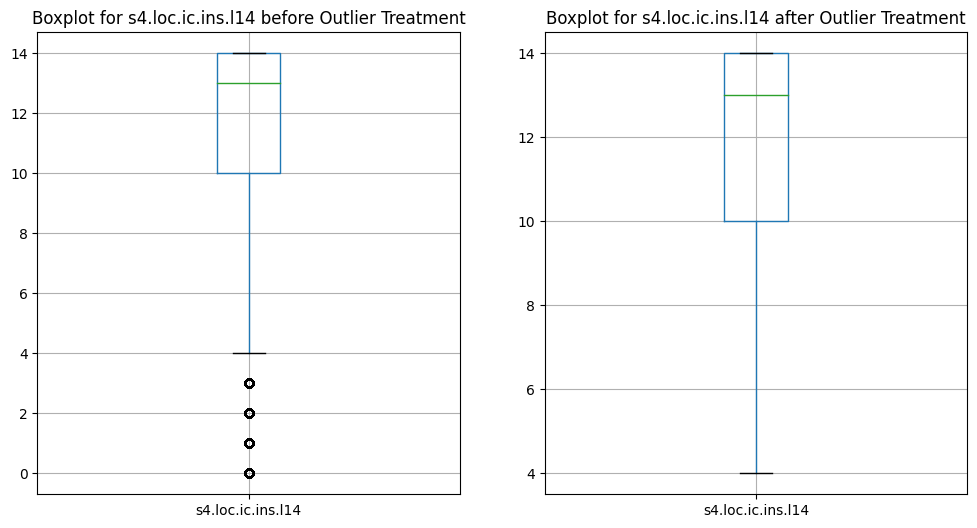



s4.usg.ins.l14: 1788 outliers below and 0 outliers above


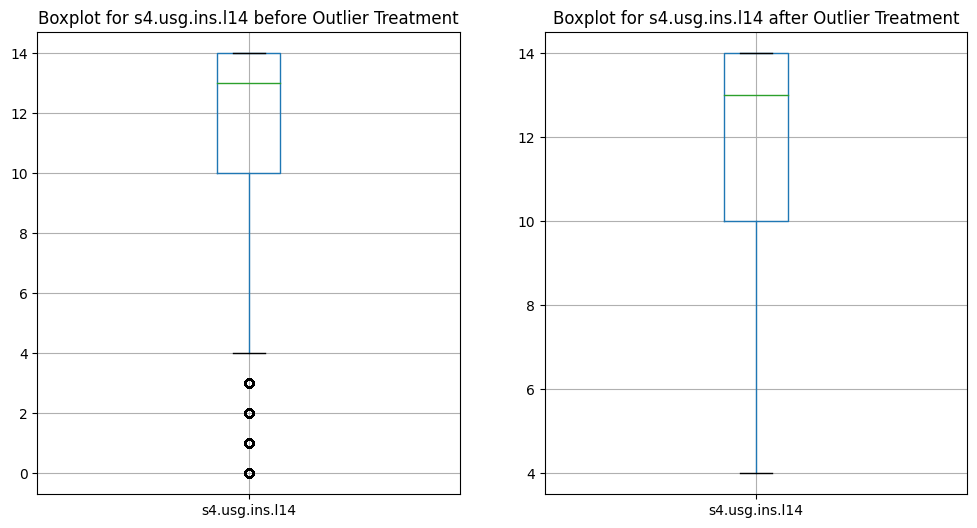



s4.loc.og.ins.p2: 0 outliers below and 0 outliers above


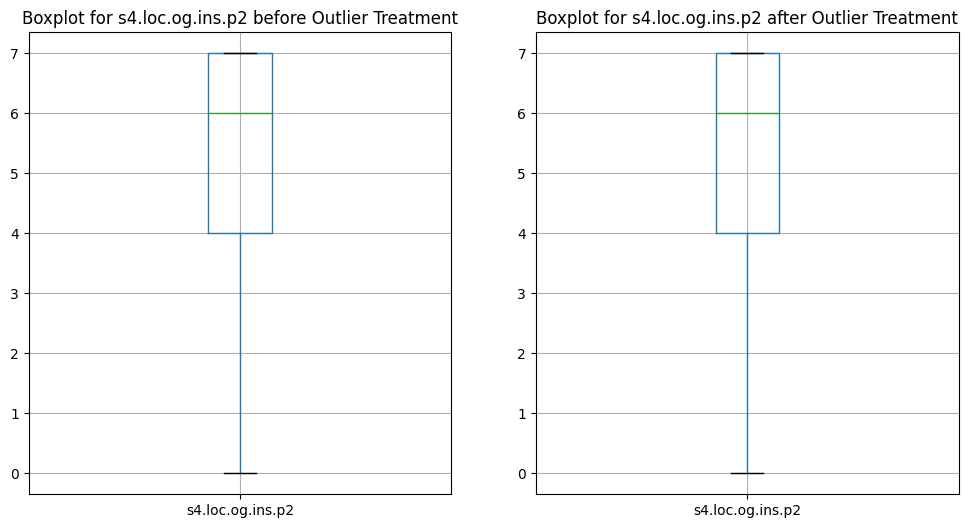



s3.rtd.mou.p1: 0 outliers below and 1955 outliers above


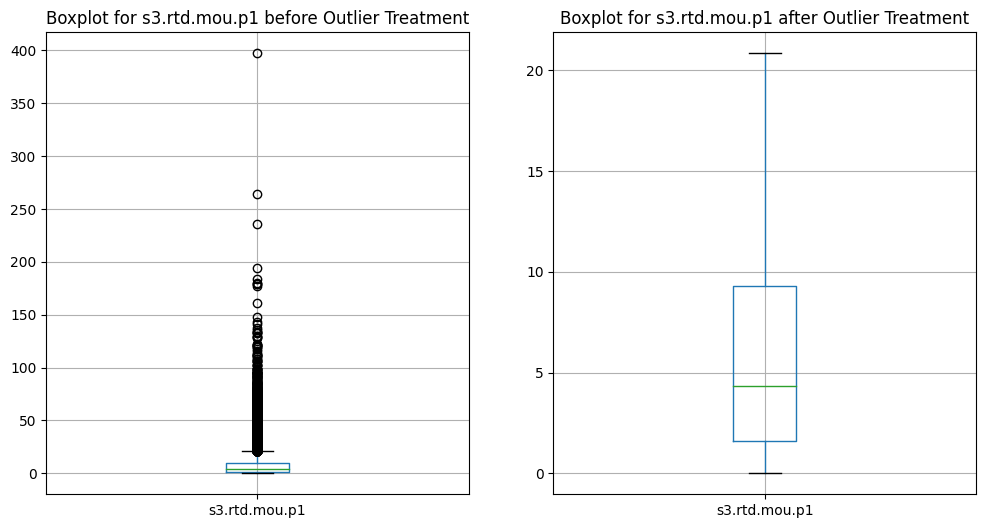



s7.s5.s4.day.nomou.p2: 0 outliers below and 0 outliers above


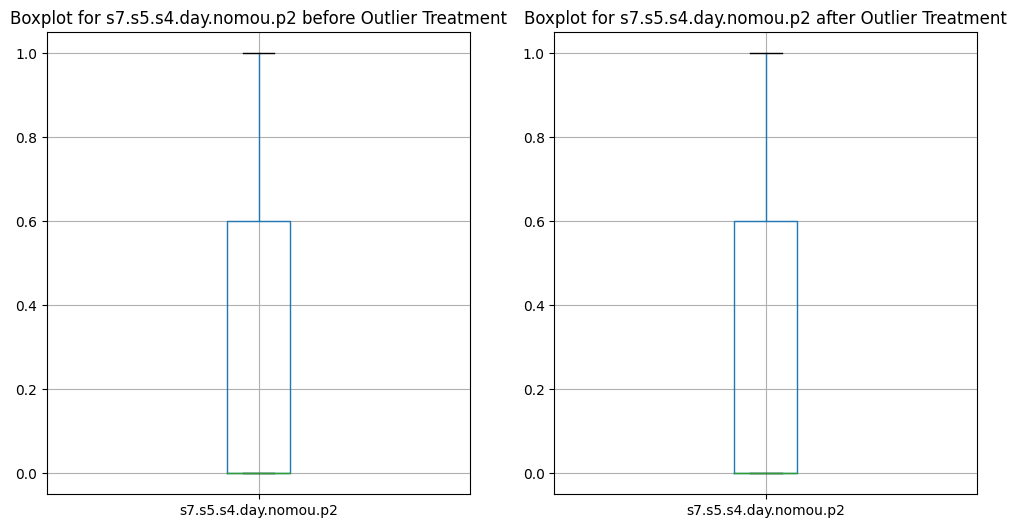



s8.og.mou.all.p6: 1739 outliers below and 1705 outliers above


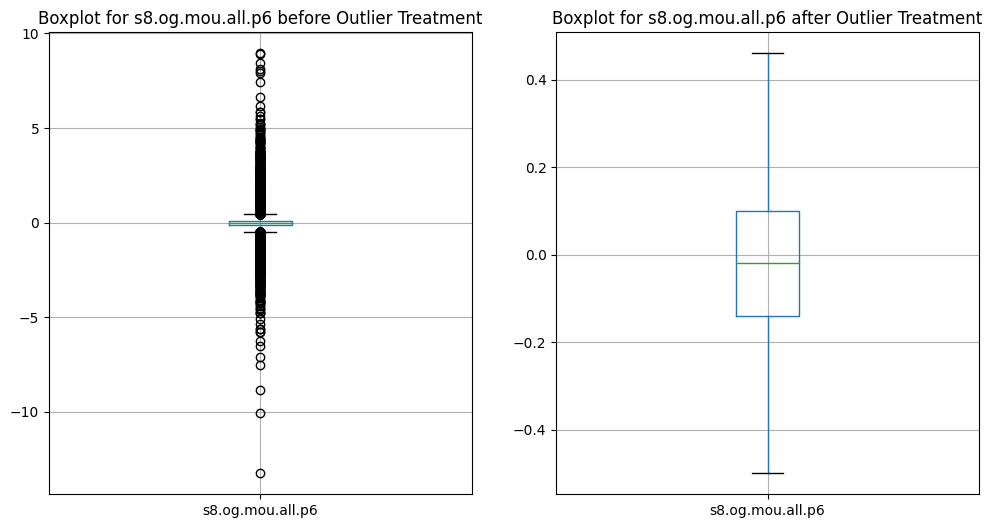



s5.og.hom.mou.p2: 0 outliers below and 1871 outliers above


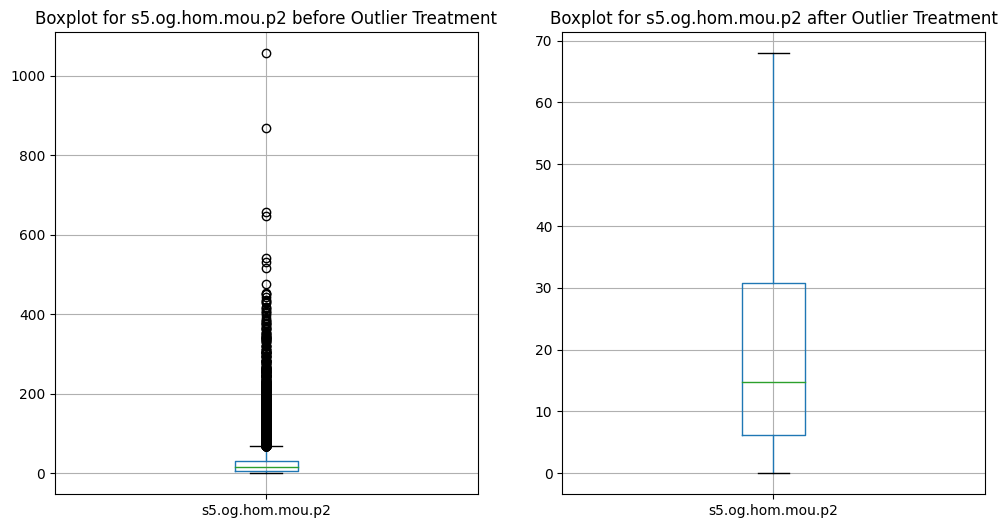



s7.rtd.mou.m1.m2: 0 outliers below and 1185 outliers above


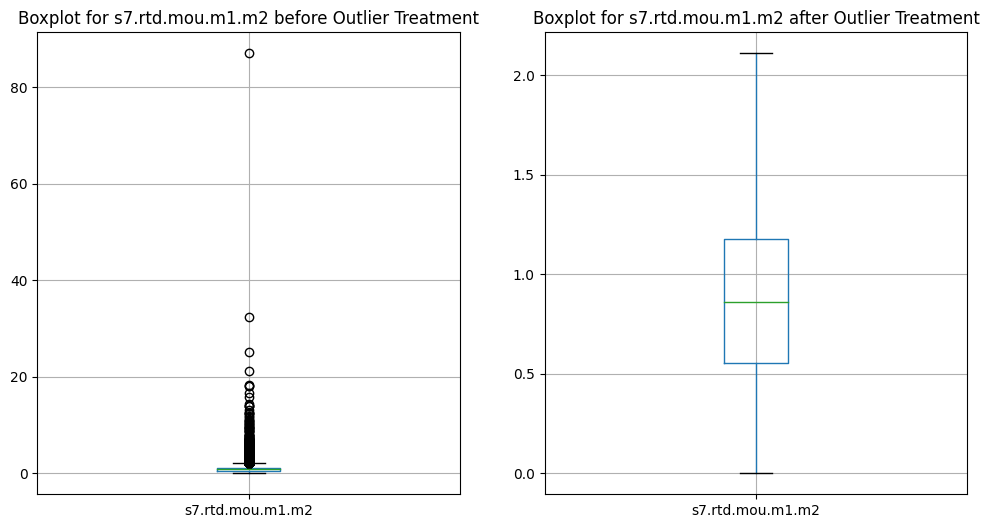



prop.og.mou.tot.mou.all.p2: 0 outliers below and 0 outliers above


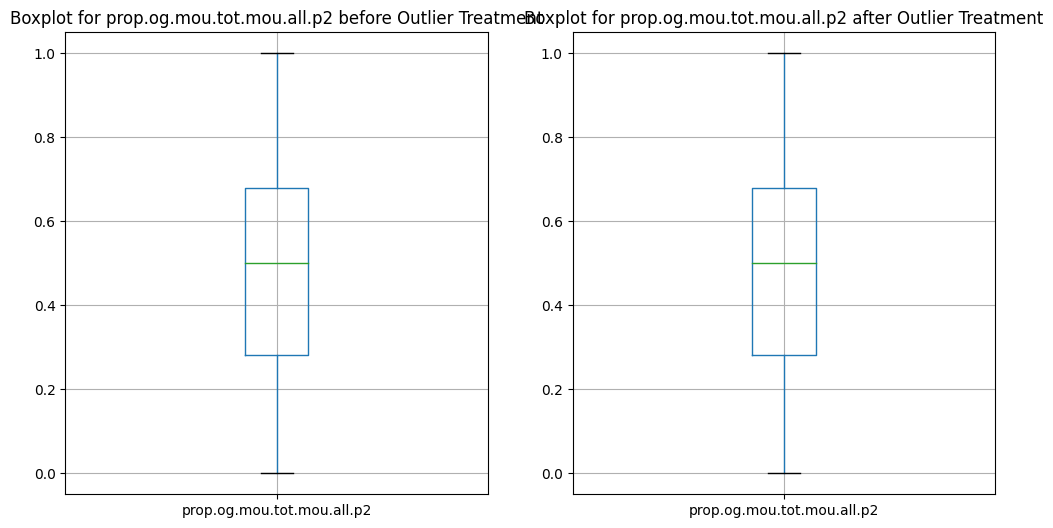



s8.rev.p6: 1218 outliers below and 1155 outliers above


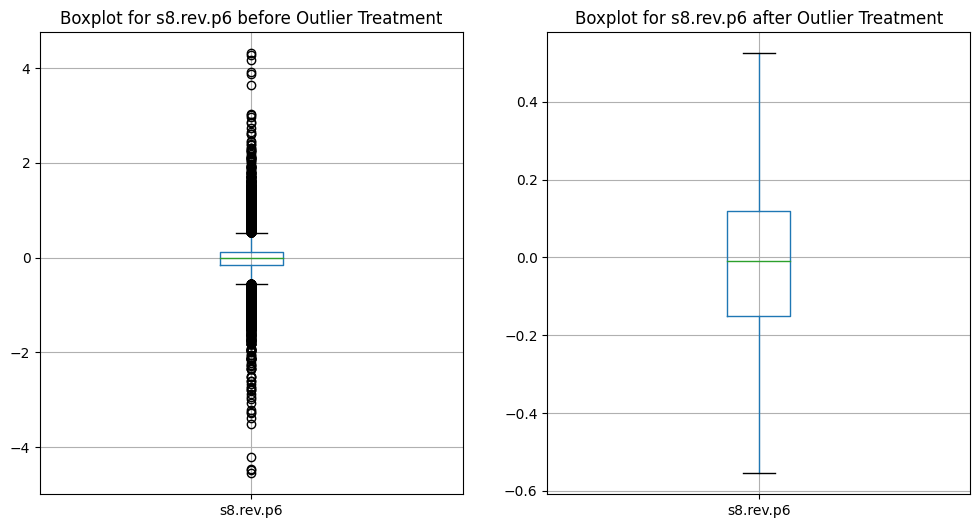



s7.s5.s4.day.nomou.p3: 0 outliers below and 0 outliers above


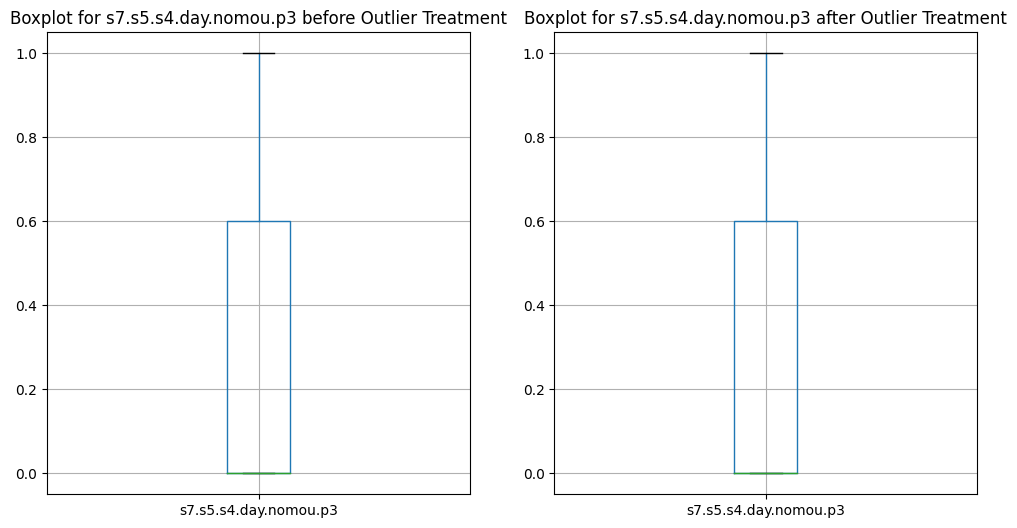



s5.rev.p2: 0 outliers below and 1996 outliers above


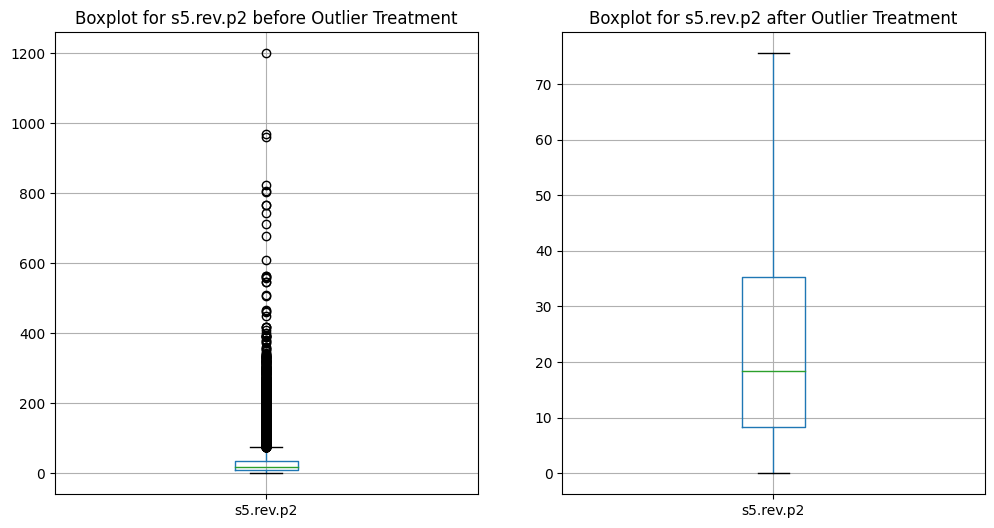



s1.new.rev.m2: 0 outliers below and 1312 outliers above


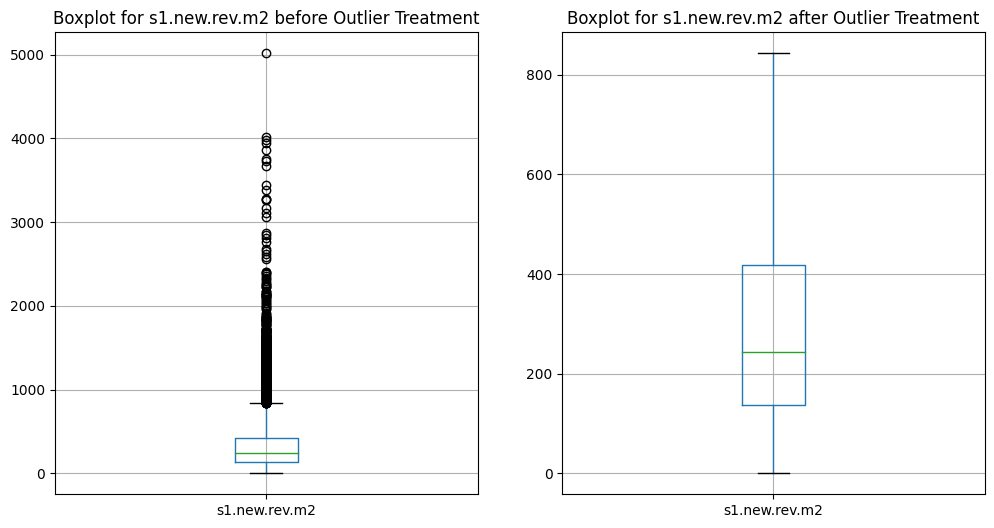



s3.og.rev.3db.p5: 0 outliers below and 1497 outliers above


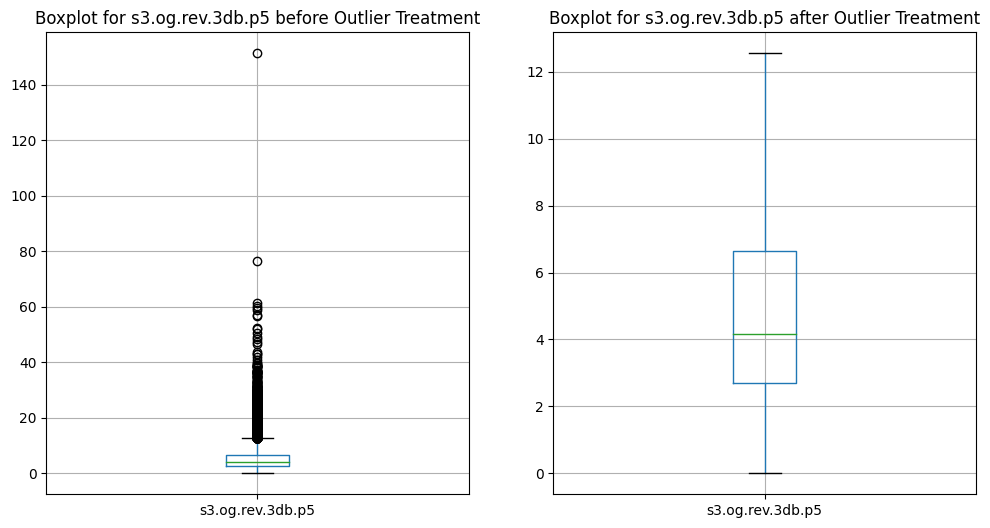



s4.rch.val.gt.30.p2: 0 outliers below and 1412 outliers above


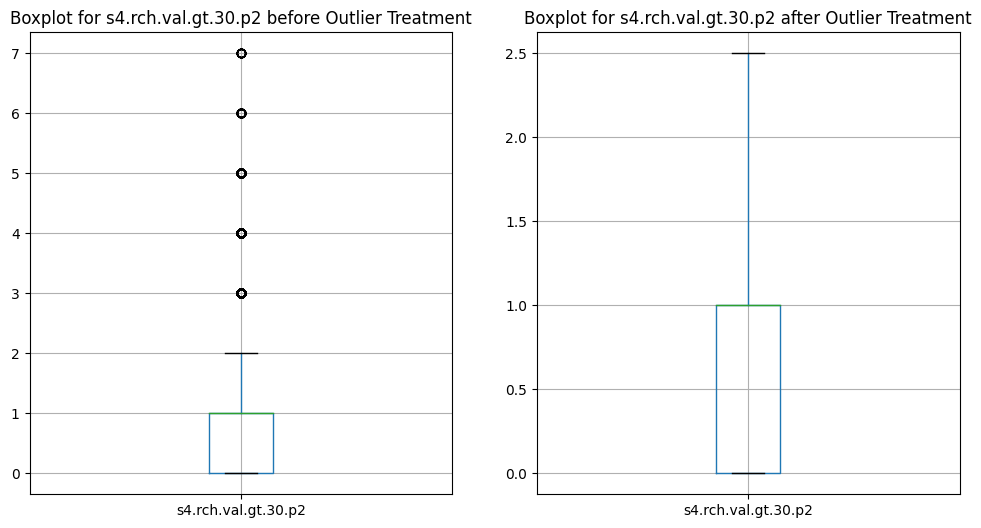



s8.rtd.mou.p6: 1668 outliers below and 1588 outliers above


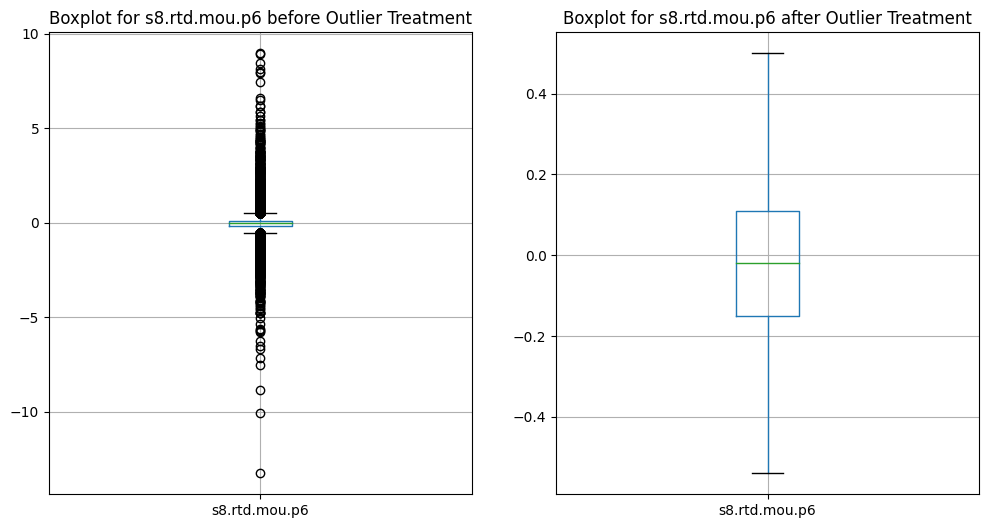



s4.std.ins.l14: 0 outliers below and 3353 outliers above


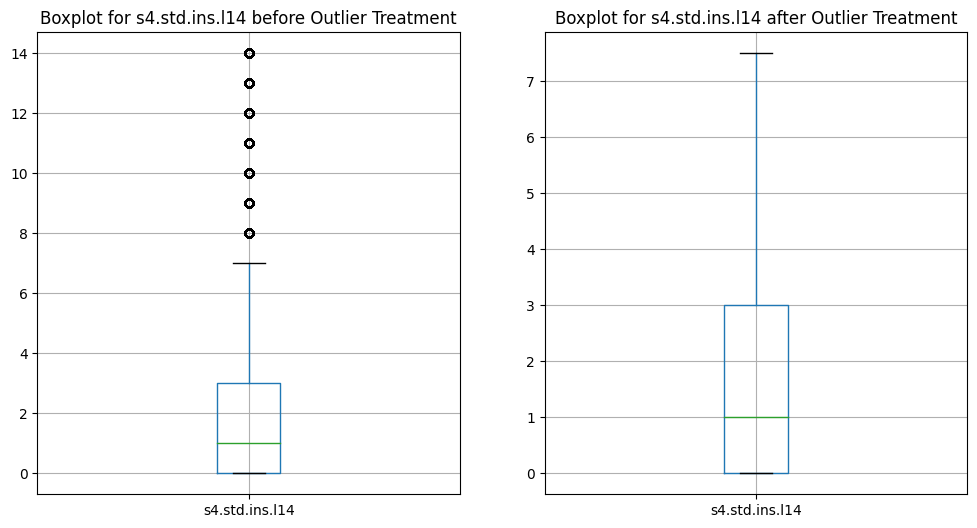



s4.low.blnc.ins.p2: 0 outliers below and 0 outliers above


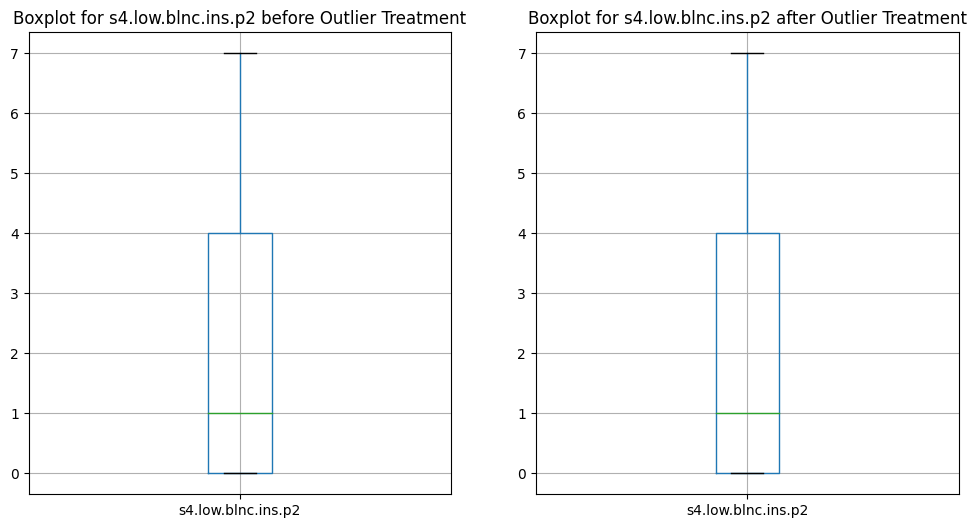



s4.low.blnc.ins.p6: 0 outliers below and 0 outliers above


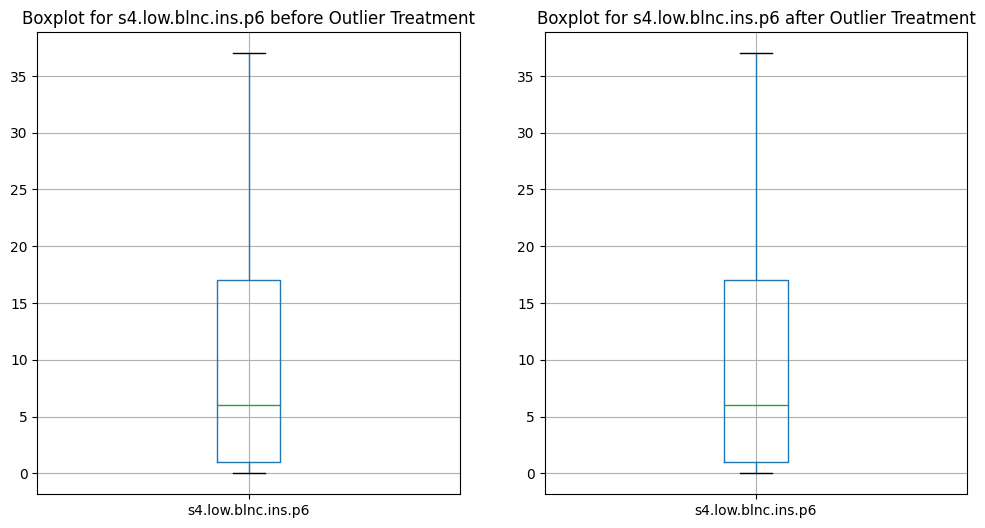



s4.loc.ins.l14: 4603 outliers below and 0 outliers above


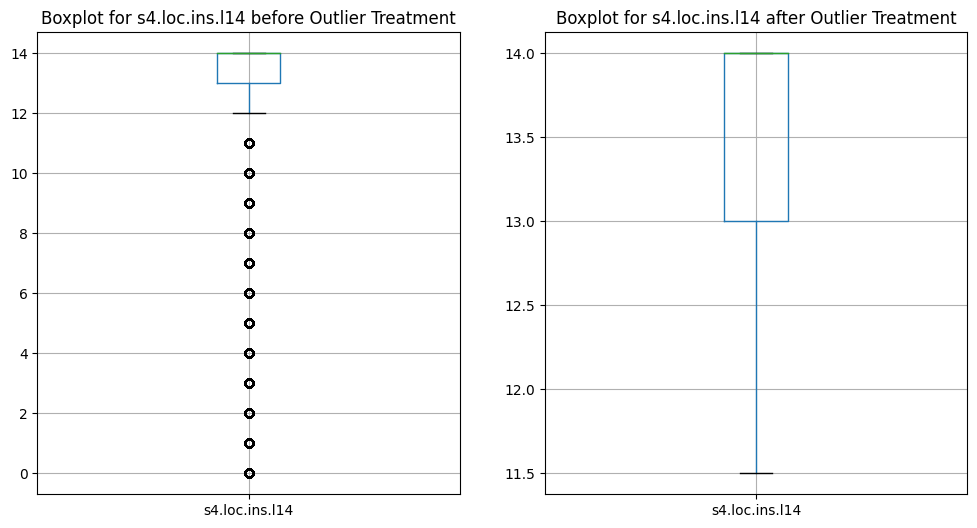



s4.low.blnc.ins.m2: 0 outliers below and 0 outliers above


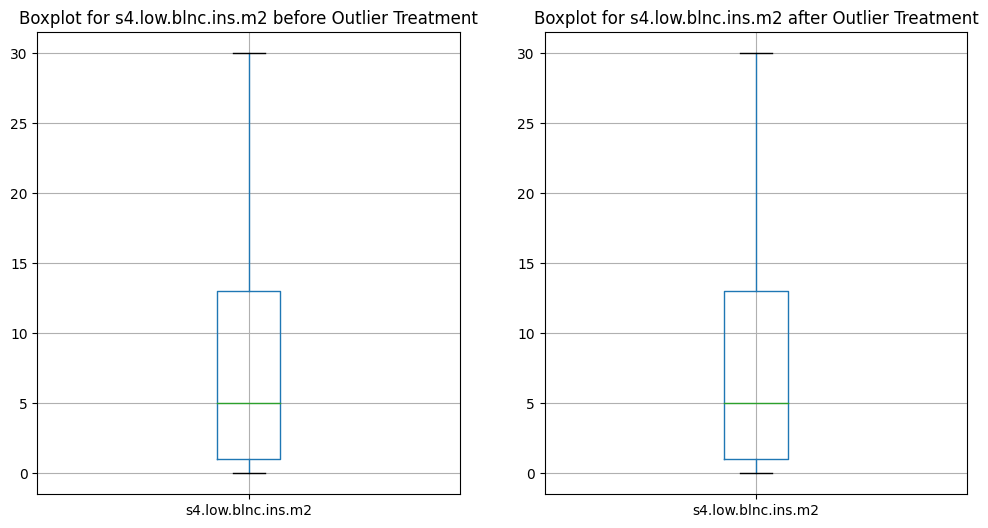



s4.data.ins.l14: 0 outliers below and 4244 outliers above


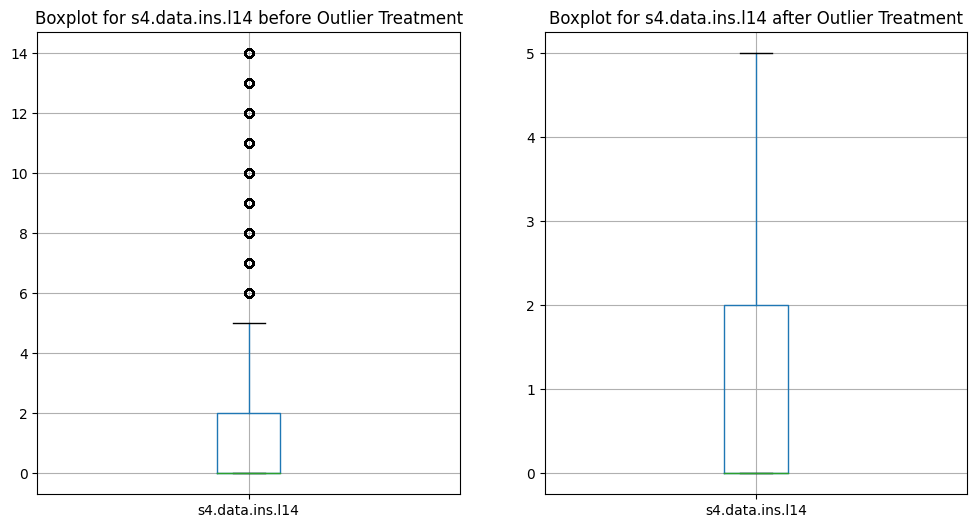



prop.loc.i2i.mou.og.mou.p6: 0 outliers below and 0 outliers above


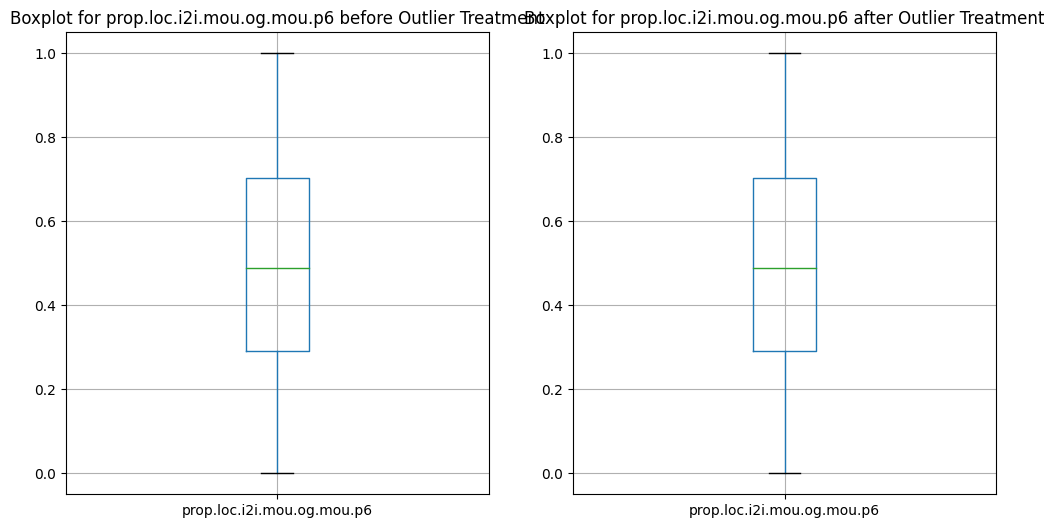



s4.dec.ins.p2: 0 outliers below and 0 outliers above


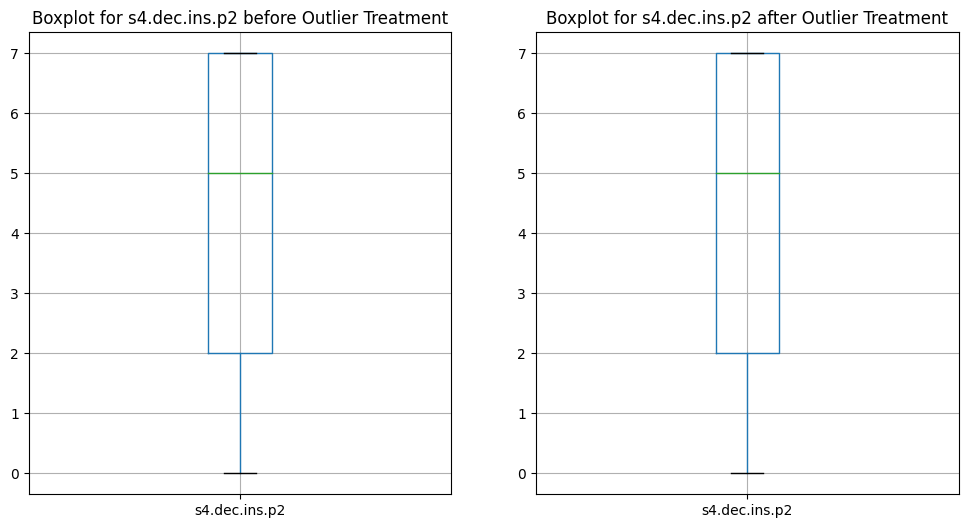



s1.rev.p2: 1 outliers below and 1709 outliers above


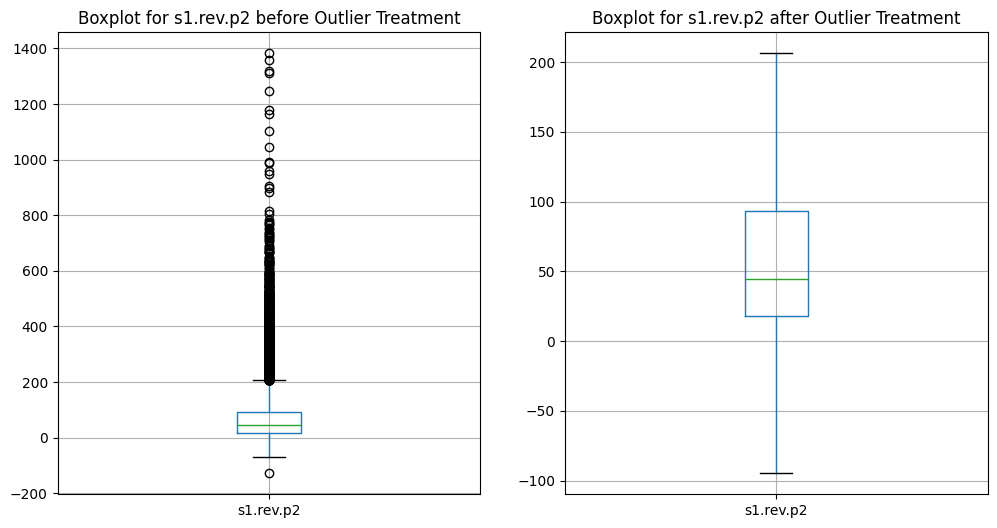



prop.og.mou.tot.mou.all.p6: 0 outliers below and 0 outliers above


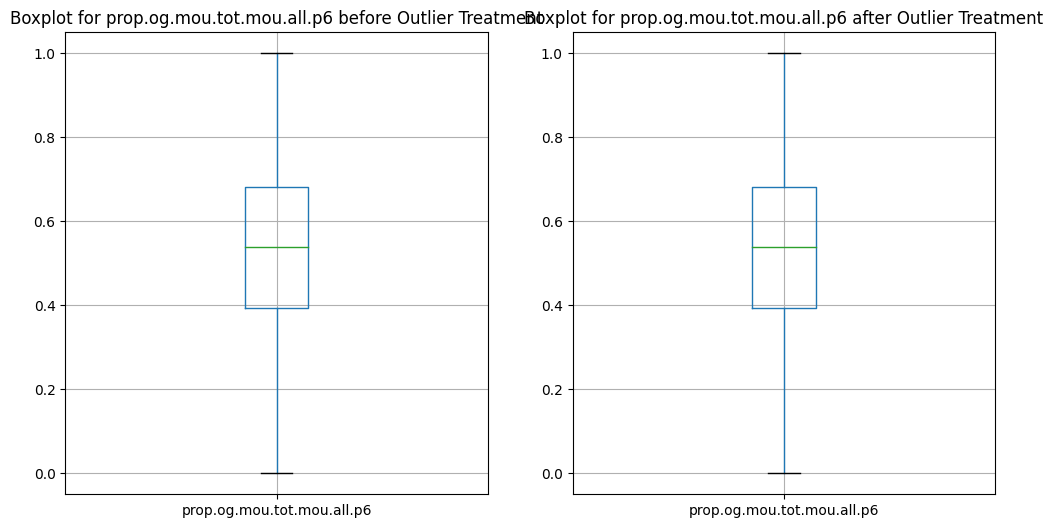



prop.i2i.og.mou.p6: 0 outliers below and 0 outliers above


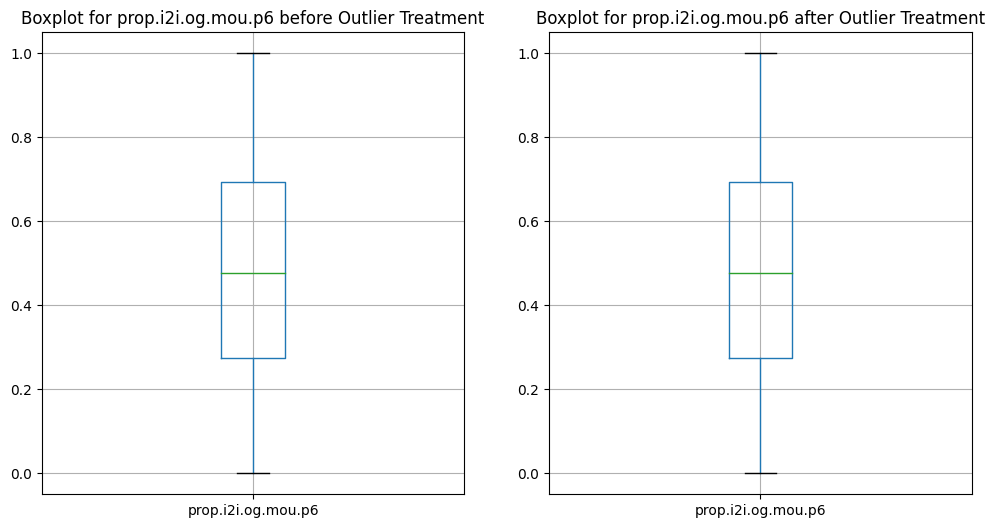



s4.loc.ic.ins.p2: 1631 outliers below and 0 outliers above


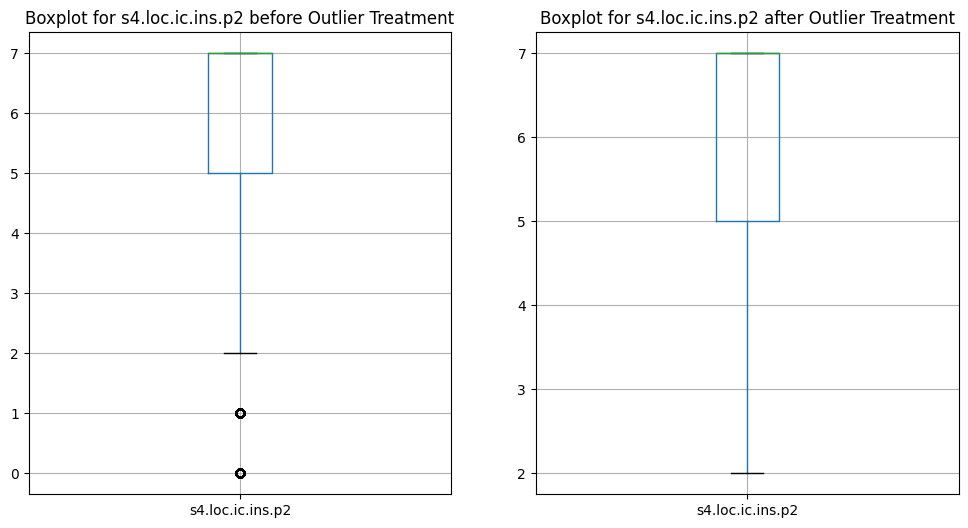



s4.std.ic.ins.l14: 0 outliers below and 2881 outliers above


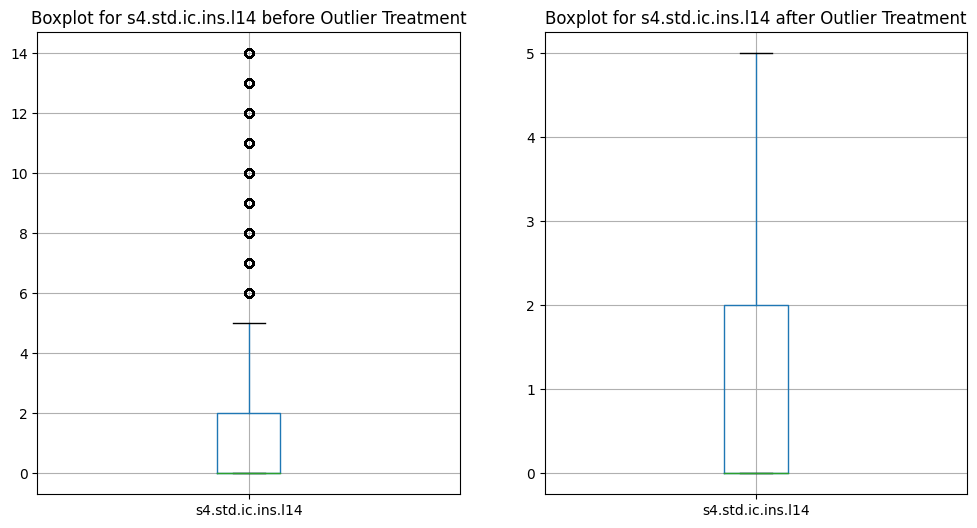



s4.low.blnc.ins.p4: 0 outliers below and 0 outliers above


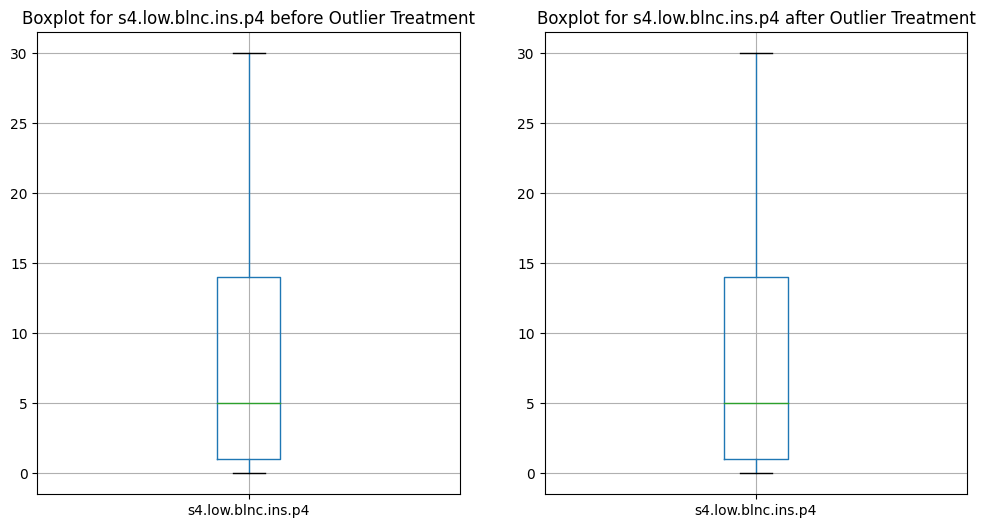



s3.og.rev.all.m2: 0 outliers below and 1438 outliers above


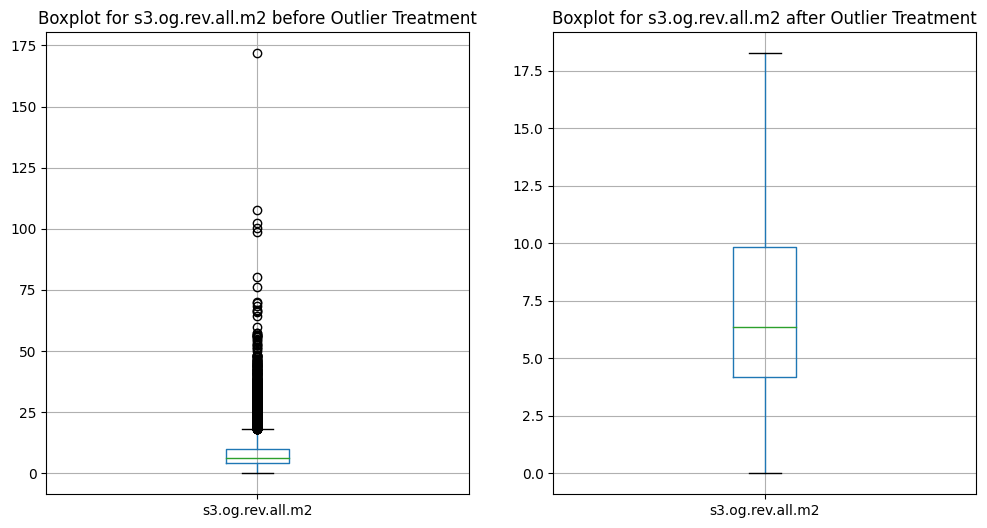



s3.new.rev.m2: 0 outliers below and 1947 outliers above


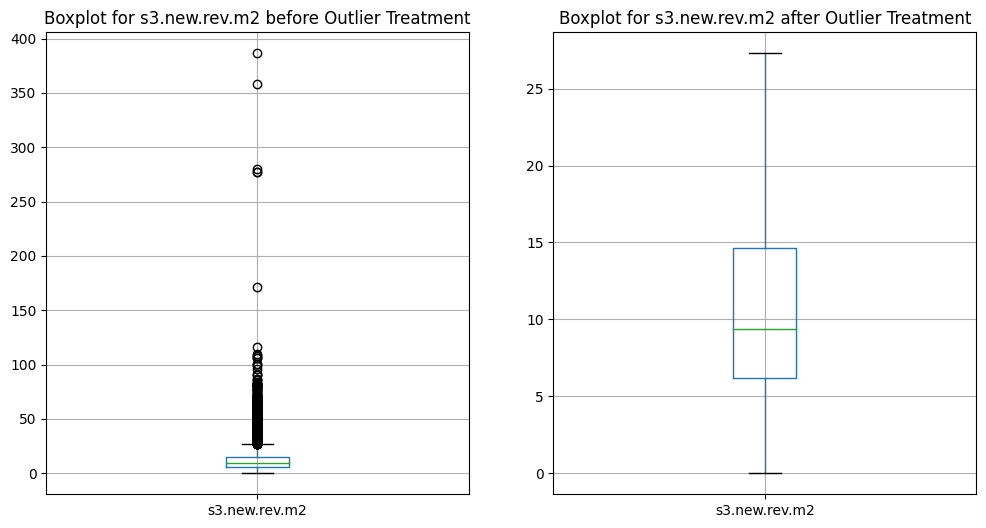



prop.og.mou.any.p6: 0 outliers below and 0 outliers above


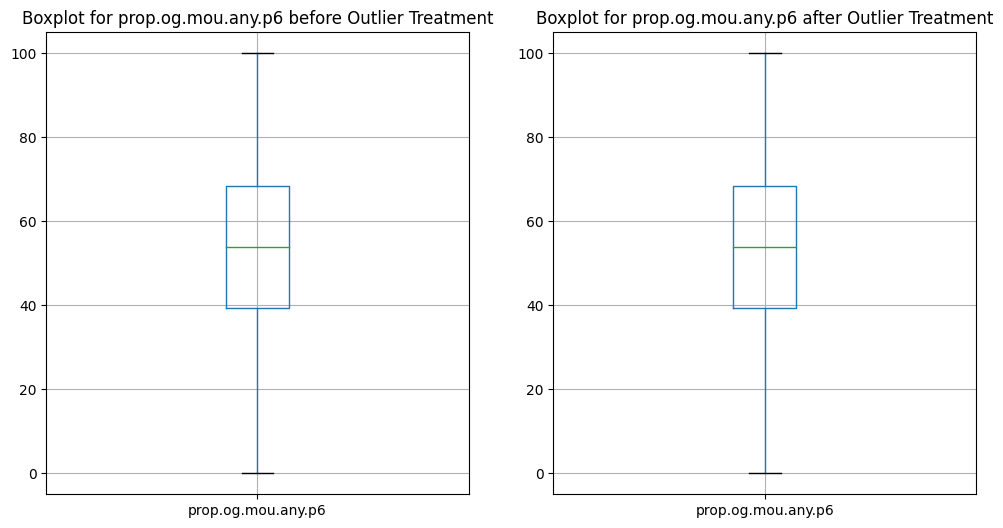



prop.loc.i2i.mou.og.mou.p3: 0 outliers below and 0 outliers above


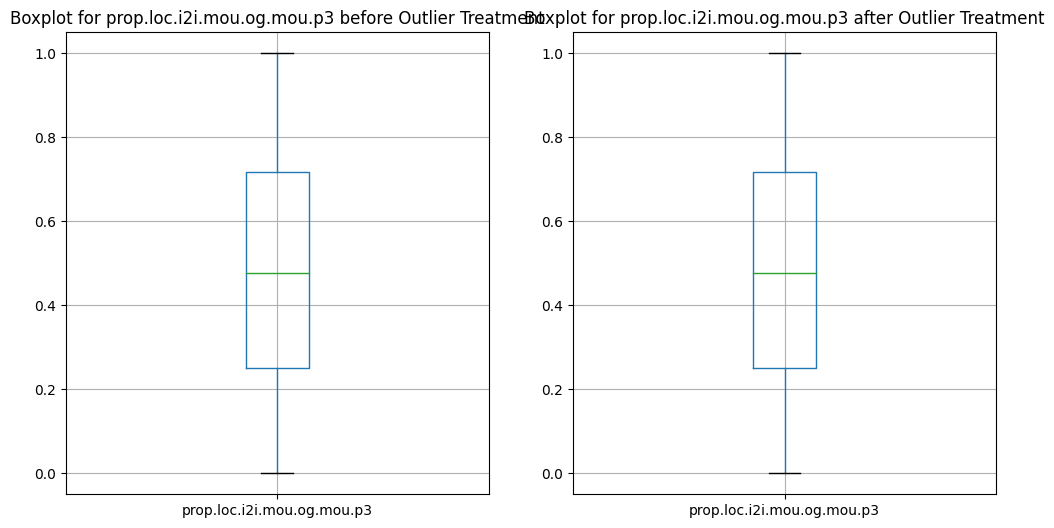



s3.rev.p1: 0 outliers below and 1831 outliers above


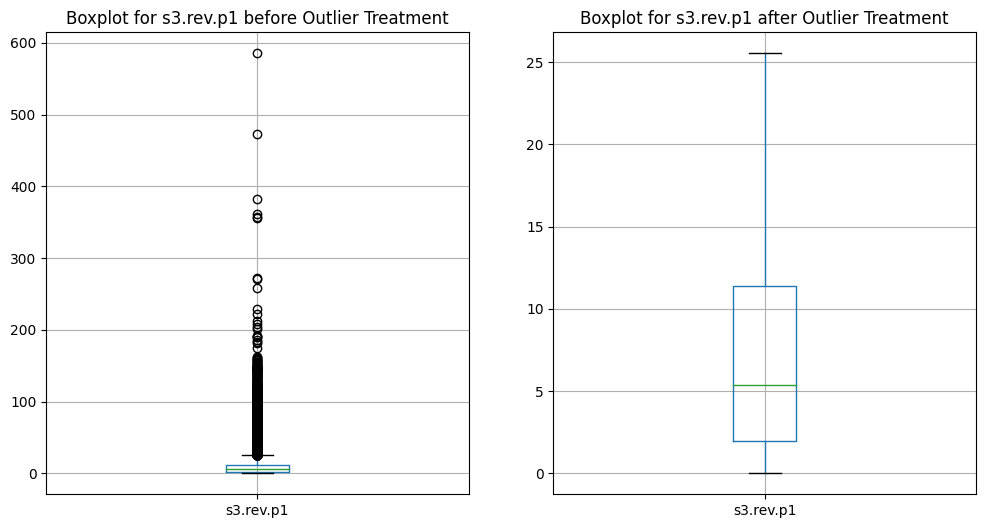

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_below = df[col][df[col] < lower_bound].count() #selects and count only values less than lower_boung
    outliers_above = df[col][df[col] > upper_bound].count()
    return outliers_below, outliers_above

#winsorization
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR #lower boundary for outliers.
    upper_bound = Q3 + 1.5 * IQR #upper boundary
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

# Apply the outlier treatment to all numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    outliers_below, outliers_above = count_outliers(data, col)
    print(f"{col}: {outliers_below} outliers below and {outliers_above} outliers above")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    data.boxplot(column=[col])
    plt.title(f"Boxplot for {col} before Outlier Treatment")

    treat_outliers(data, col)

    plt.subplot(1, 2, 2)
    data.boxplot(column=[col])
    plt.title(f"Boxplot for {col} after Outlier Treatment")
    plt.show()
    print("\n")


In [ ]:
# Remove records if NA's are more than 5%
threshold = len(data.columns) * 0.05
data = data.dropna(thresh=threshold, axis=0)

# Remove columns if NA's are 50% or more
threshold = len(data) * 0.50
data = data.dropna(thresh=threshold, axis=1)

# Impute remaining missing values
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Check the dataset after missing value treatment
print("Shape after missing value treatment:", data.shape)

# Additional check for missing values
missing_values = data.isnull().sum()
print("Total missing values after treatment:", missing_values)

Shape after missing value treatment: (25000, 111)
Total missing values after treatment: s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
                             ..
s3.og.rev.all.m2              0
s3.new.rev.m2                 0
prop.og.mou.any.p6            0
prop.loc.i2i.mou.og.mou.p3    0
s3.rev.p1                     0
Length: 111, dtype: int64


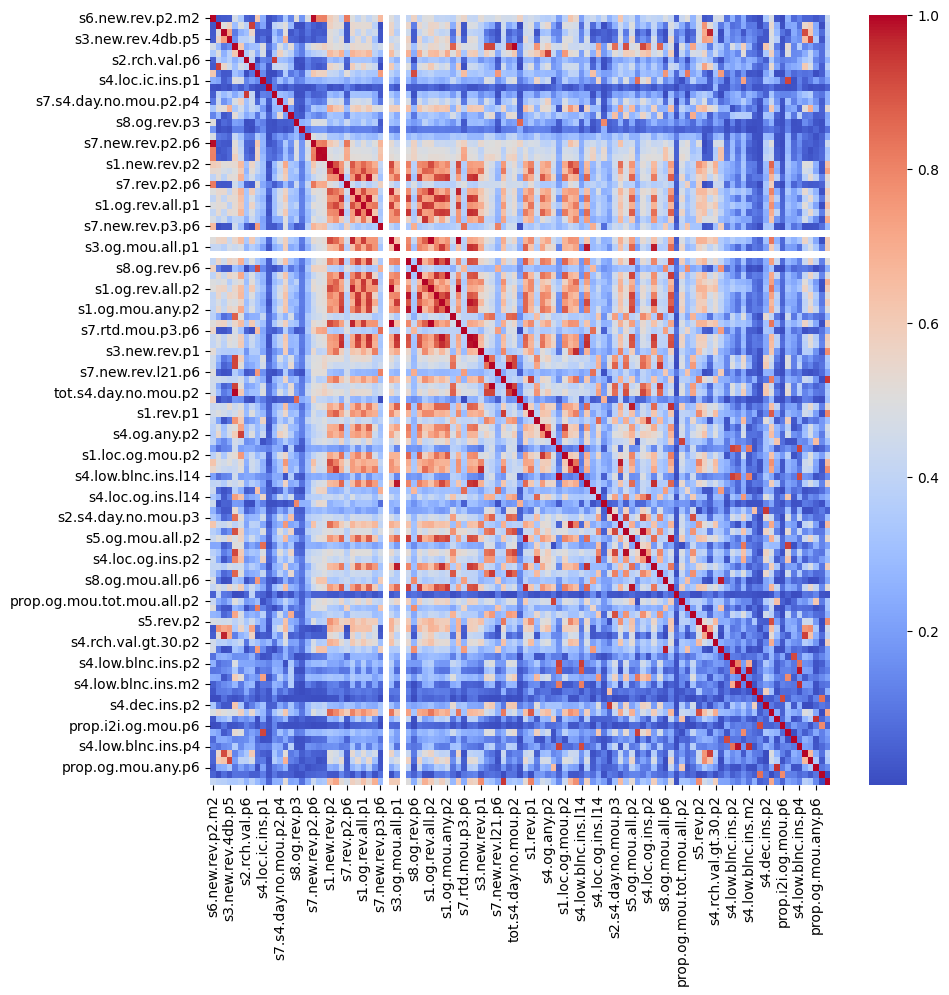

In [ ]:
import seaborn as sns
# Calculate correlation matrix
corr_matrix = data.corr().abs()

# Display the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
data = data.drop(columns=to_drop)
print("Shape after dropping highly correlated features:", data.shape)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
X = data.select_dtypes(include=['float64', 'int64'])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

threshold_vif=10
high_vif_cols = vif_data[vif_data["VIF"] > threshold_vif]["feature"].tolist()
print("Columns with VIF > 10:", high_vif_cols)

# Drop features with VIF > high_vif_threshold
data = data.drop(columns=high_vif_cols)
print("Shape after dropping features with high VIF:", data.shape)

Shape after dropping highly correlated features: (25000, 56)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                       feature         VIF
0             s6.new.rev.p2.m2   12.553391
1                s1.new.rev.m1   14.244254
2             s3.og.rev.4db.p5   16.762061
3            s3.new.rev.4db.p5   20.763404
4                s4.usg.ins.p2  102.424078
5             s4.og.unq.any.p2    9.464711
6                s2.rch.val.p6    5.136519
7                s8.new.rev.p6    8.281926
8             s4.loc.ic.ins.p1   59.098005
9                    s8.mbl.p2    1.390703
10      s7.s4.day.no.mou.p2.p4    2.990800
11               s3.new.rev.p3   18.387060
12       s7.s5.s4.day.nomou.p4    4.014451
13                s8.og.rev.p3    7.894972
14            s8.ic.mou.all.p3    1.256390
15                      target    2.189635
16            s6.rtd.mou.p2.m2    9.873856
17               s1.new.rev.p2   41.308042
18            s1.og.hom.mou.p1   26.878871
19                s7.rev.p2.p6   19.021257
20            s1.og.hom.rev.p2   28.421148
21            s3.og.rev.all.p1   17.809228
22         

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% --> testing


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 79.36%
Confusion Matrix:


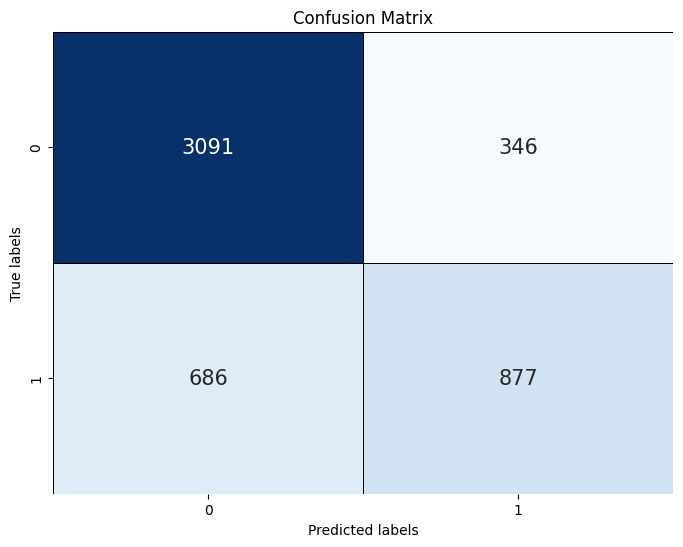

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score


# Model Evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy*100,2)}%')

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 15}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


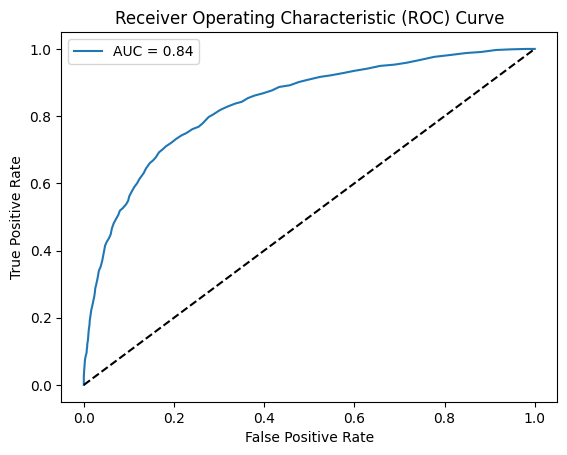

In [ ]:
# ROC Curve
y_pred_proba = rf.predict_proba(X_test)[:, 1] #Probabilities of the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=20,             # Maximum depth of the tree
    min_samples_split=5,      # Minimum number of samples required to split an internal node
    min_samples_leaf=2,       # Minimum number of samples required to be at a leaf node
    max_features='sqrt',      # Number of features to consider when looking for the best split
    random_state=42           # Random seed for reproducibility
)
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

Accuracy: 80.06%
Confusion Matrix:


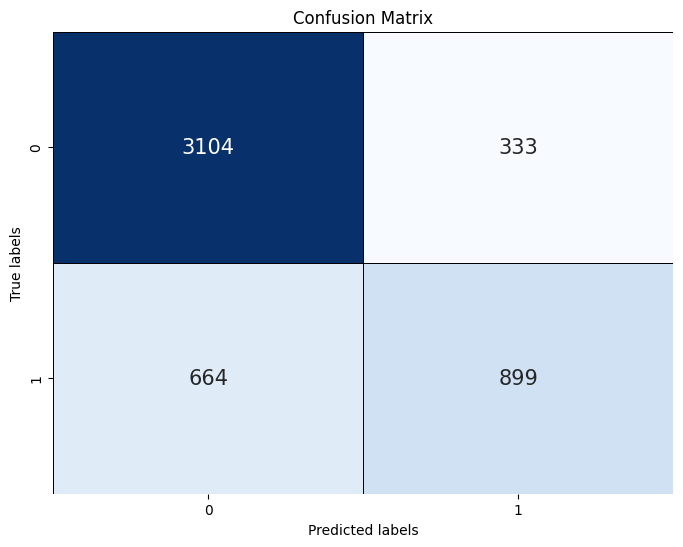

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

# Model Evaluation
y_pred = rf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy*100,2)}%')

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 15}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


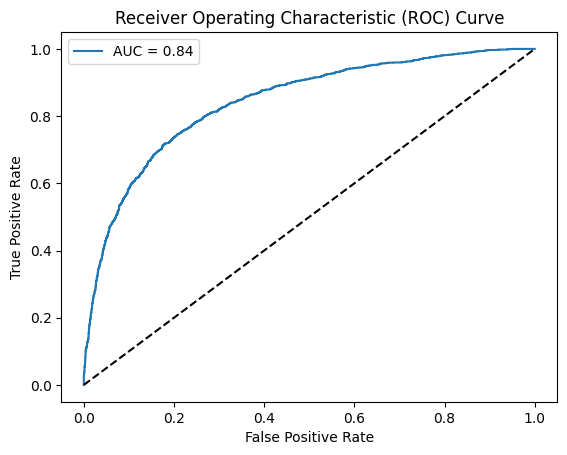

In [ ]:
# ROC Curve
y_pred_proba = rf1.predict_proba(X_test)[:, 1] #Probabilities of the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the classifier
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy*100,2)}%')

Accuracy: 71.1%


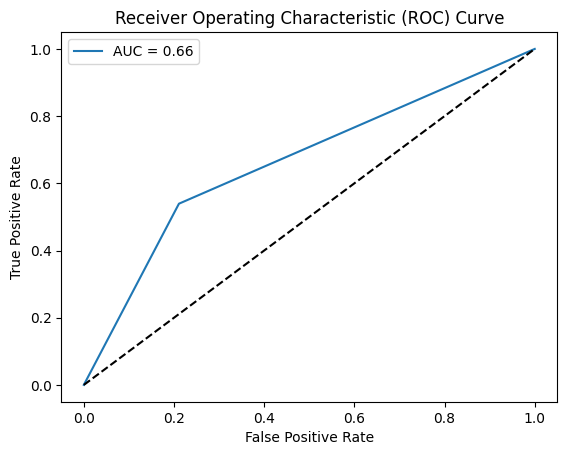

In [ ]:
y_pred_proba = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy*100, 2)}%')
print(f'Best estimator: {best_dt}')


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Accuracy: 78.2%
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Fitting the model to the training data
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy*100,2)}%')

Accuracy: 79.98%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


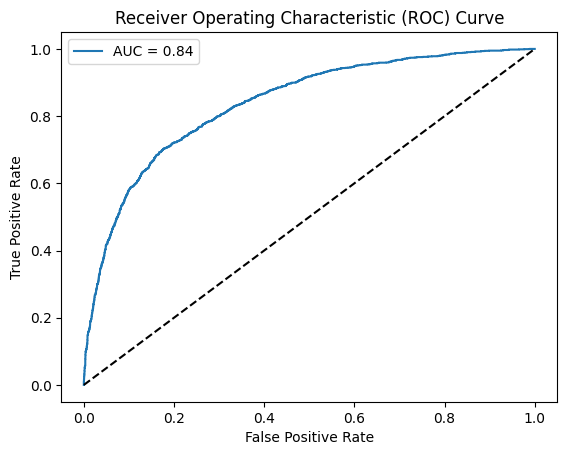

In [ ]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()